### Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder  #sklearn is a package that helps with machine learning models
from sklearn.model_selection import train_test_split # to split teh dataset into training and testing 
from sklearn.linear_model import LogisticRegression #LogisticRegression is used in classification problems
from sklearn.tree import DecisionTreeClassifier #Decision Tree works on all patterns of data, not only linear ones
from sklearn.ensemble import RandomForestClassifier #Random Forest algorithm is an advanced decision tree algorttithm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix # confusion matrix is used to evaluate our model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import warnings

# Ignore all warnings 
warnings.filterwarnings("ignore")

### Reading the datasets using pandas

In [2]:
df =pd.read_csv("churn_data.csv")
df2 = pd.read_csv("customer_data.csv")
df3 = pd.read_csv("historical_price_data.csv")

In [3]:
df.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [4]:
df.shape

(16096, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [6]:
df2.shape

(16096, 32)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [8]:
df3.shape

(193002, 8)

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Merging of the 3 datasets into one single dataframe

In [10]:
Merged_data = pd.merge(df,df2, on ="id")

In [11]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   churn                     16096 non-null  int64  
 2   activity_new              6551 non-null   object 
 3   campaign_disc_ele         0 non-null      float64
 4   channel_sales             11878 non-null  object 
 5   cons_12m                  16096 non-null  int64  
 6   cons_gas_12m              16096 non-null  int64  
 7   cons_last_month           16096 non-null  int64  
 8   date_activ                16096 non-null  object 
 9   date_end                  16094 non-null  object 
 10  date_first_activ          3508 non-null   object 
 11  date_modif_prod           15939 non-null  object 
 12  date_renewal              16056 non-null  object 
 13  forecast_base_bill_ele    3508 non-null   float64
 14  foreca

In [12]:
Merged_data = pd.merge(Merged_data,df3, on = "id")

In [13]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   churn                     193002 non-null  int64  
 2   activity_new              78570 non-null   object 
 3   campaign_disc_ele         0 non-null       float64
 4   channel_sales             142407 non-null  object 
 5   cons_12m                  193002 non-null  int64  
 6   cons_gas_12m              193002 non-null  int64  
 7   cons_last_month           193002 non-null  int64  
 8   date_activ                193002 non-null  object 
 9   date_end                  192981 non-null  object 
 10  date_first_activ          42042 non-null   object 
 11  date_modif_prod           191127 non-null  object 
 12  date_renewal              192525 non-null  object 
 13  forecast_base_bill_ele    42042 non-null   f

In [14]:
Merged_data.describe()

,churn,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,...,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,0.0,1.930020e+05,1.930020e+05,1.930020e+05,42042.000000,42042.000000,42042.000000,42042.000000,193002.000000,...,193002.000000,192822.000000,193002.000000,192966.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.099009,NaN,1.948834e+05,3.190718e+04,1.947086e+04,335.807483,335.807483,3835.596518,206.800605,2370.273676,...,1.347800,217.965424,5.031134,20.603921,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.298675,NaN,6.796728e+05,1.775814e+05,8.238021e+04,649.570278,649.570278,5425.871446,455.720989,4035.719124,...,1.460228,366.815548,1.676171,21.775187,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,...,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.000000,NaN,5.908000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.160000,0.000000,513.250000,...,1.000000,51.970000,4.000000,12.500000,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.000000,NaN,1.533200e+04,0.000000e+00,9.010000e+02,162.890000,162.890000,2186.610000,42.190000,1178.980000,...,1.000000,119.670000,5.000000,13.856000,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.000000,NaN,5.022000e+04,0.000000e+00,4.127000e+03,396.180000,396.180000,4245.810000,228.100000,2691.580000,...,1.000000,275.750000,6.000000,19.800000,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,1.000000,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,...,32.000000,24570.650000,16.000000,500.000000,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [15]:
Merged_data.head()

,id,churn,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,...,num_years_antig,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
1,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
2,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
3,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426
4,48ada52261e7cf58715202705a0451c9,0,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,...,3,ldkssxwpmemidmecebumciepifcamkci,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426


In [16]:
Merged_data.isnull().sum()

id                               0
churn                            0
activity_new                114432
campaign_disc_ele           193002
channel_sales                50595
cons_12m                         0
cons_gas_12m                     0
cons_last_month                  0
date_activ                       0
date_end                        21
date_first_activ            150960
date_modif_prod               1875
date_renewal                   477
forecast_base_bill_ele      150960
forecast_base_bill_year     150960
forecast_bill_12m           150960
forecast_cons               150960
forecast_cons_12m                0
forecast_cons_year               0
forecast_discount_energy      1507
forecast_meter_rent_12m          0
forecast_price_energy_p1      1507
forecast_price_energy_p2      1507
forecast_price_pow_p1         1507
has_gas                          0
imp_cons                         0
margin_gross_pow_ele           156
margin_net_pow_ele             156
nb_prod_act         

## Data Cleaning

In [17]:
Merged_data["channel_sales"].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    88430
lmkebamcaaclubfxadlmueccxoimlema    24861
usilxuppasemubllopkaafesmlibmsdf    17314
ewpakwlliwisiwduibdlfmalxowmwpci    11587
sddiedcslfslkckwlfkdpoeeailfpeds      143
epumfxlbckeskwekxbiuasklxalciiuu       48
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: count, dtype: int64

In [18]:
# Checking the total null values in channel sales features

Merged_data["channel_sales"].isnull().sum()

50595

In [19]:
# Replacing null values in channel sales with missing

Merged_data["channel_sales"] = Merged_data["channel_sales"].fillna("Missing Channels")

In [20]:
Merged_data["channel_sales"].isnull().sum()

0



### Replacing encoded datas with meaningful details for better interpretation

In [21]:
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('epumfxlbckeskwekxbiuasklxalciiuu','channel1')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('ewpakwlliwisiwduibdlfmalxowmwpci','channel2')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('fixdbufsefwooaasfcxdxadsiekoceaa','channel3')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('foosdfpfkusacimwkcsosbicdxkicaua','channel4')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('lmkebamcaaclubfxadlmueccxoimlema','channel5')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('sddiedcslfslkckwlfkdpoeeailfpeds','channel6')
Merged_data['channel_sales']=Merged_data['channel_sales'].replace('usilxuppasemubllopkaafesmlibmsdf','channel7')

In [22]:
Merged_data["channel_sales"].value_counts()

channel_sales
channel4            88430
Missing Channels    50595
channel5            24861
channel7            17314
channel2            11587
channel6              143
channel1               48
channel3               24
Name: count, dtype: int64

In [23]:
Merged_data["origin_up"].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    93804
kamkkxfxxuwbdslkwifmmcsiusiuosws    54177
ldkssxwpmemidmecebumciepifcamkci    43943
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

In [24]:
# Calculate the mode of the 'origin_up' column
Mode_origin = Merged_data['origin_up'].mode()[0]  # Extract the first mode value

# Fill missing values in 'origin_up' with the mode
Merged_data['origin_up'] = Merged_data['origin_up'].fillna(Mode_origin)

In [25]:
Mode_origin

'lxidpiddsbxsbosboudacockeimpuepw'

In [26]:
Merged_data["origin_up"].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    94846
kamkkxfxxuwbdslkwifmmcsiusiuosws    54177
ldkssxwpmemidmecebumciepifcamkci    43943
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

In [27]:
Merged_data['origin_up']=Merged_data['origin_up'].replace('ewxeelcelemmiwuafmddpobolfuxioce','origin1')
Merged_data['origin_up']=Merged_data['origin_up'].replace('kamkkxfxxuwbdslkwifmmcsiusiuosws','origin2')
Merged_data['origin_up']=Merged_data['origin_up'].replace('ldkssxwpmemidmecebumciepifcamkci','origin3')
Merged_data['origin_up']=Merged_data['origin_up'].replace('lxidpiddsbxsbosboudacockeimpuepw','origin4')
Merged_data['origin_up']=Merged_data['origin_up'].replace('usapbepcfoloekilkwsdiboslwaxobdp','origin5')

In [28]:
Merged_data["origin_up"].value_counts()

origin_up
origin4    94846
origin2    54177
origin3    43943
origin5       24
origin1       12
Name: count, dtype: int64

In [29]:
Merged_data['has_gas'].value_counts()

has_gas
f    157466
t     35536
Name: count, dtype: int64

In [30]:
# Converting has gas features to numerical data 

gas_code = {
    't' : '1',
    'f' : '0'
}

In [31]:
Merged_data["has_gas"].replace(gas_code,inplace=True)

In [32]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        193002 non-null  object 
 1   churn                     193002 non-null  int64  
 2   activity_new              78570 non-null   object 
 3   campaign_disc_ele         0 non-null       float64
 4   channel_sales             193002 non-null  object 
 5   cons_12m                  193002 non-null  int64  
 6   cons_gas_12m              193002 non-null  int64  
 7   cons_last_month           193002 non-null  int64  
 8   date_activ                193002 non-null  object 
 9   date_end                  192981 non-null  object 
 10  date_first_activ          42042 non-null   object 
 11  date_modif_prod           191127 non-null  object 
 12  date_renewal              192525 non-null  object 
 13  forecast_base_bill_ele    42042 non-null   f

### Conversion of data types

In [33]:
# Converting date/time features to date type

for i in ['date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'price_date'] : 
    Merged_data[i] = pd.to_datetime(Merged_data[i])

### Extracting relevant years needed for analysis


In [34]:
# Filling date end missing with  because we need it for the calculation

Merged_data['date_end']=Merged_data['date_end'].fillna(method='ffill')


# EXtraction of customer start year 

Merged_data['Start Year'] = Merged_data['date_activ'].dt.year

#Extraction of End year

Merged_data['End Year'] = Merged_data['date_end'].dt.year

# Extraction of Total year spent 

#Merged_data['Year Stayed'] = Merged[]

### Handling missing values 

In [35]:
# Filling missing date modified with mean so it can follow the trend of the Data and not be biased

mean_modif = Merged_data['date_modif_prod'].mean() #mean calculation

Merged_data['date_modif_prod'] = Merged_data['date_modif_prod'].fillna(mean_modif)

In [36]:
# filling date renewal with mean so it can follow the trend of the data and not be biased

mean_renewal = Merged_data['date_renewal'].mean() #mean calculation

Merged_data['date_renewal'] = Merged_data['date_renewal'].fillna(mean_renewal)

In [37]:
# filling missing price energy p1 with mean since the mode is very close to the mean calculation

Mean_price1 = Merged_data['forecast_price_energy_p1'].mean()

Merged_data['forecast_price_energy_p1'] = Merged_data['forecast_price_energy_p1'].fillna(Mean_price1)

In [38]:
# filling missing price p2 with mean

Mean_price2 = Merged_data['forecast_price_energy_p2'].mean()

Merged_data['forecast_price_energy_p2'] = Merged_data['forecast_price_energy_p2'].fillna(Mean_price2)

In [39]:
# filling missing price pow p1 with mean because the value is not biased when comapred with the mode and median as well

mean_pow = Merged_data['forecast_price_pow_p1'].mean() #mean calculation

Merged_data['forecast_price_pow_p1'] = Merged_data['forecast_price_pow_p1'].fillna(mean_pow)

In [40]:
# filling missing gross with mean 

mean_gross = Merged_data['margin_gross_pow_ele'].mean()

Merged_data['margin_gross_pow_ele'] = Merged_data['margin_gross_pow_ele'].fillna(mean_gross)

In [41]:
# filling net pow with mean

mean_net = Merged_data['margin_net_pow_ele'].mean() # mean calculation

Merged_data['margin_net_pow_ele'] = Merged_data['margin_net_pow_ele'].fillna(mean_net)

In [42]:
# filling net pow with mean

mean_net2 = Merged_data['net_margin'].mean()

Merged_data['net_margin'] = Merged_data['net_margin'].fillna(mean_net2)

In [43]:
# filling net pow with mean

mean_pow = Merged_data['pow_max'].mean()

Merged_data['pow_max'] = Merged_data['pow_max'].fillna(mean_pow)

In [44]:
mean_discount = Merged_data['forecast_discount_energy'].mean()

Merged_data['forecast_discount_energy'] = Merged_data['forecast_discount_energy'].fillna(mean_discount)

In [45]:
# filling net pow with mean

mean_p1 = Merged_data['price_p1_var'].mean()

Merged_data['price_p1_var'] = Merged_data['price_p1_var'].fillna(mean_p1)

In [46]:
mean_p2 = Merged_data['price_p2_var'].mean()

Merged_data['price_p2_var'] = Merged_data['price_p2_var'].fillna(mean_p2)

In [47]:
mean_p3 = Merged_data['price_p3_var'].mean()

Merged_data['price_p3_var'] = Merged_data['price_p3_var'].fillna(mean_p3)

In [48]:
mean_fix1 = Merged_data['price_p1_fix'].mean()

Merged_data['price_p1_fix'] = Merged_data['price_p1_fix'].fillna(mean_fix1)

In [49]:
mean_fix2 = Merged_data['price_p2_fix'].mean()

Merged_data['price_p2_fix'] = Merged_data['price_p2_fix'].fillna(mean_fix2)

In [51]:
mean_fix3 = Merged_data['price_p3_fix'].mean()

Merged_data['price_p3_fix'] = Merged_data['price_p3_fix'].fillna(mean_fix3)

### Dropping of Features with extreme missing values 

In [52]:
Merged_data = Merged_data.drop(columns=['activity_new', 'campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele', 
                                        'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'])

In [53]:
Merged_data.isnull().sum()

id                          0
churn                       0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
price_date                  0
price_p1_var                0
price_p2_var                0
price_p3_var                0
price_p1_fix                0
price_p2_fix                0
price_p3_fix                0
Start Year

## Creating a copy of the cleaned data set

In [54]:
data = Merged_data.copy()

## Exploring and analyzing the data using visuals(EDA)

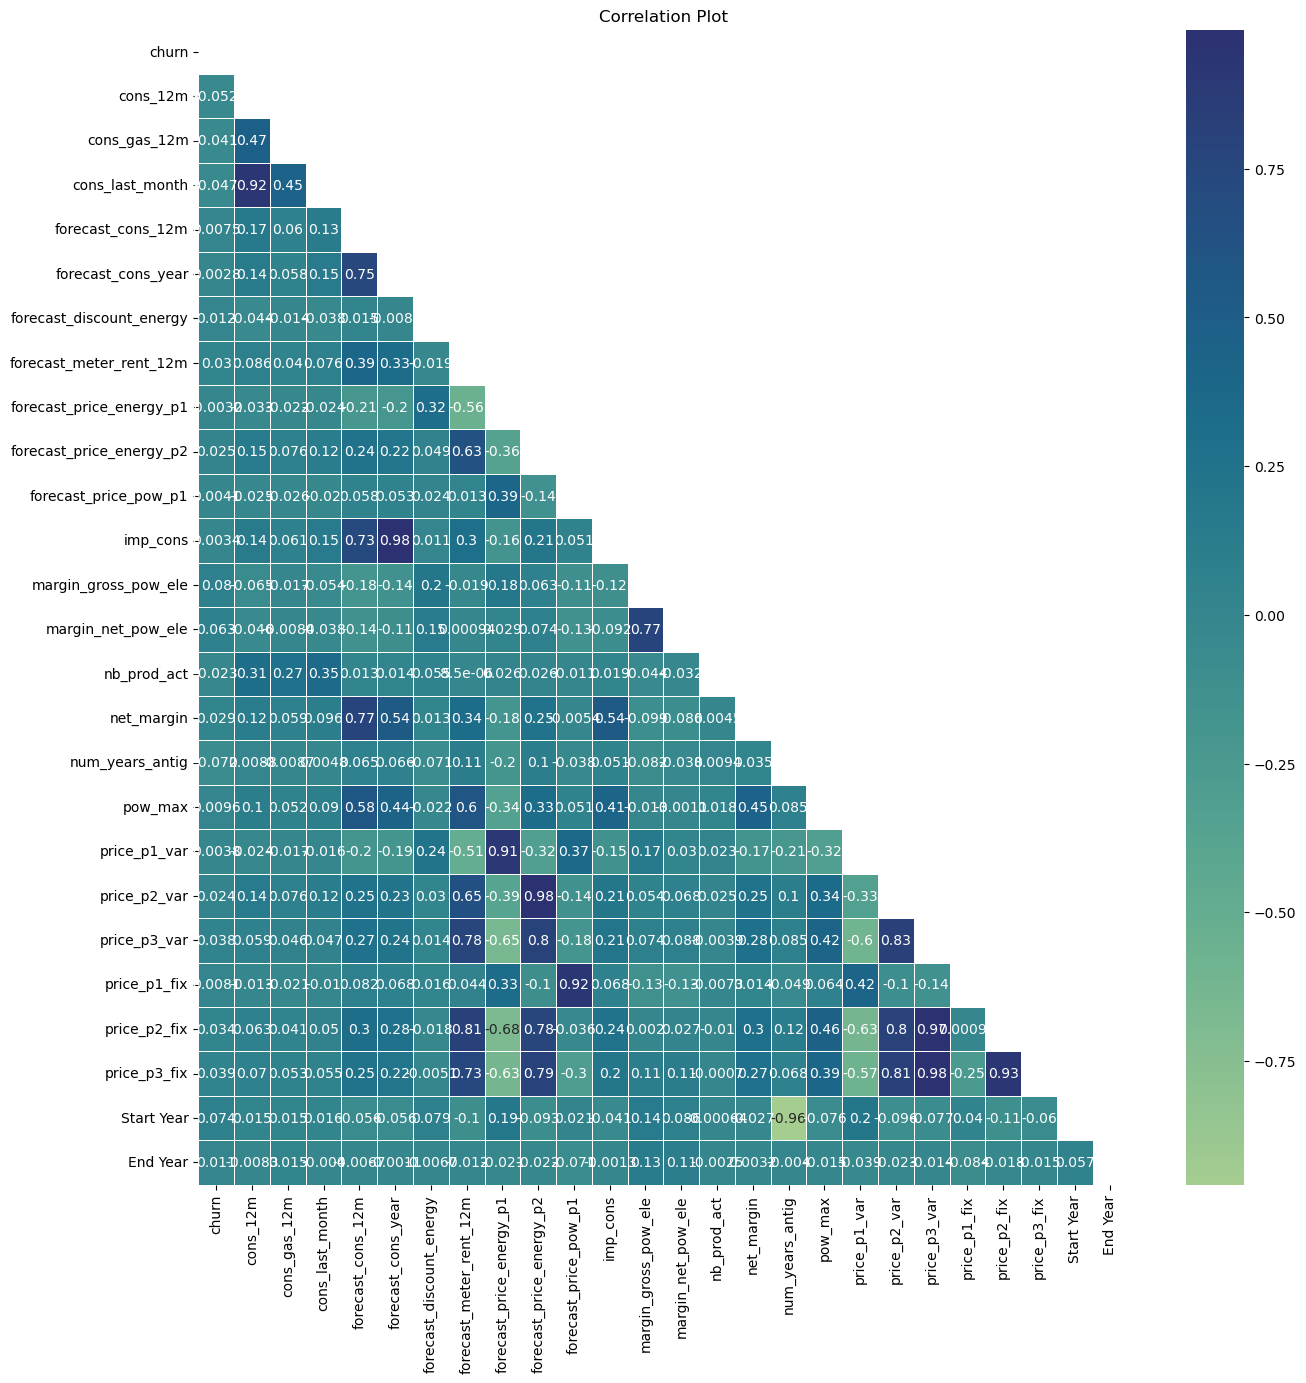

In [107]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
data_corr = data_numeric.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data_corr, annot=True, cmap="crest", linewidths=0.5, mask=mask)
plt.title('Correlation Plot')
plt.show()

#### Highly correlated values means the feature conveys the same information and one of them can be dropped to prevent multicollinearity
#### or retained depending on the importance of the features to the model.
#### features with deeper colors are highly correlated 
#### some of the highly correlated features will be dropped to avoid redundancy in the model.

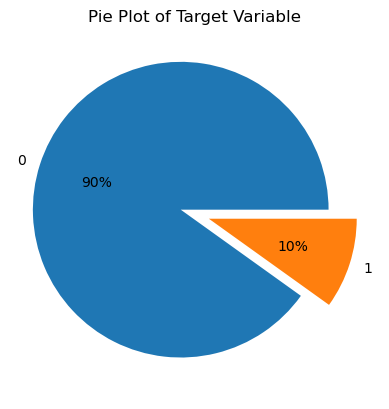

In [159]:
# Pie plot of target variable
counts = data['churn'].value_counts()
explode = [0.1] * len(counts)  # Adjusted to the number of unique values

# Function to format the percentage display
autopct = lambda pct: "{:.0f}%".format(pct)

plt.pie(
    counts,
    labels=counts.index,
    explode=explode,
    autopct=autopct,
)

plt.title("Pie Plot of Target Variable")
plt.show()

#### The proportion of subscribers who switched to a differnet service provider is 10%

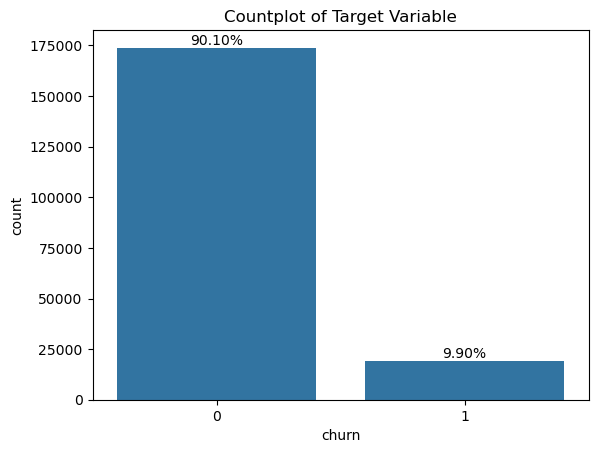

In [161]:
# Assuming 'data' is your DataFrame and 'churn' is the target variable
count_data = data['churn'].value_counts(normalize=True)*100  # Calculate percentages
sns_countplot = sns.countplot(x=data["churn"])
sns_countplot.set_title("Countplot of Target Variable")

# Annotate bars with percentage values
for p in sns_countplot.patches:
    percentage = f'{p.get_height() / len(data)*100:.2f}%'  # Calculate percentage
    sns_countplot.annotate(percentage, 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom')

plt.show()

#### About 9.90% of the subscribers switched to a different service provider leaving 90% with the organization.

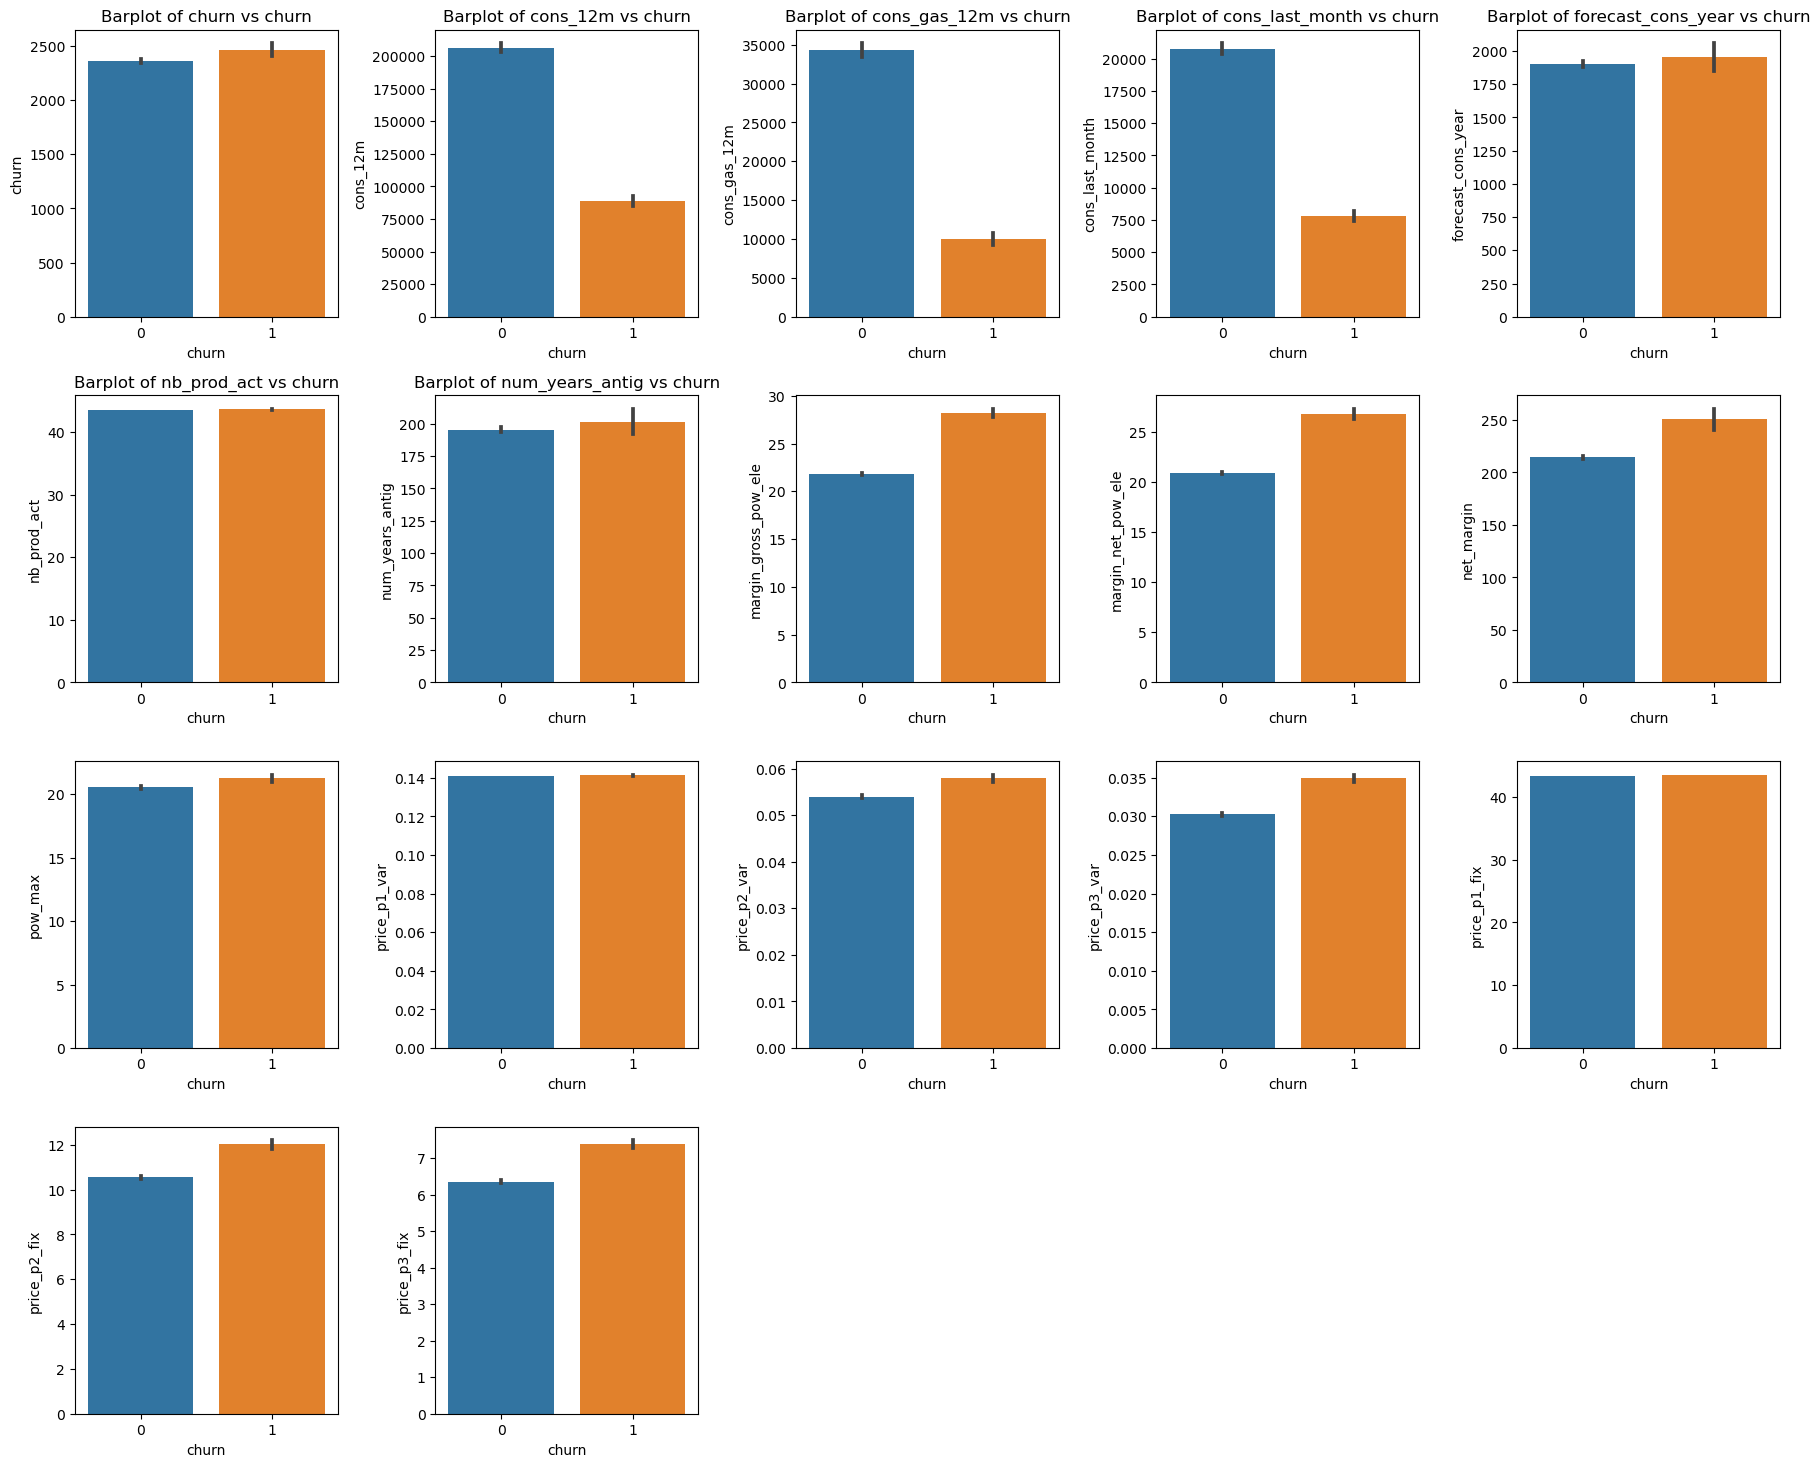

<Figure size 1800x1800 with 0 Axes>

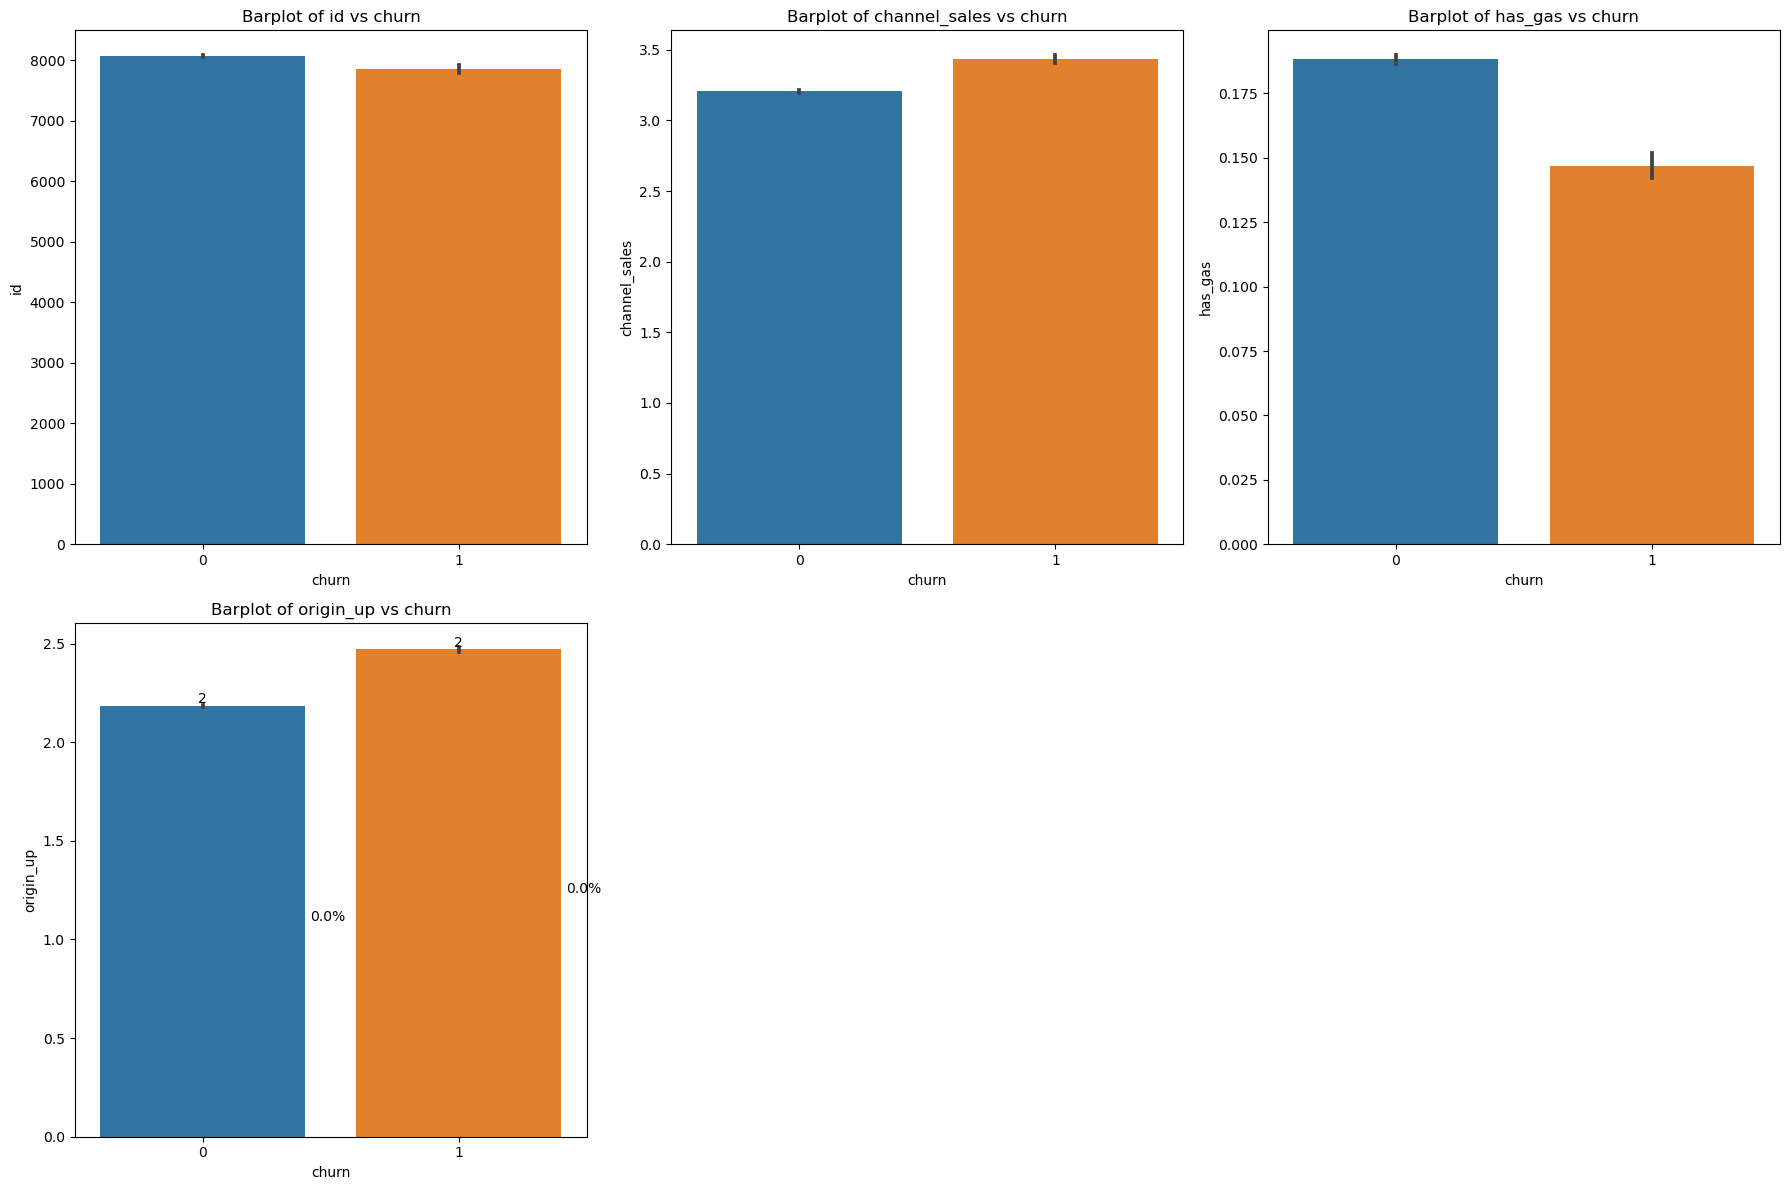

In [224]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(data.select_dtypes(include=["float64"]).columns):
    ax = plt.subplot(5, 5, i + 1)
    sns.barplot(data=data, x=data.churn, y=col, ax=ax)


for i, col in enumerate(data.select_dtypes(include=["int64"]).columns):
    ax = plt.subplot(5, 5, i + 1)  # Adjust subplot grid size as needed
    sns.barplot(data=data, x='churn', y=col, ax=ax)
    ax.set_title(f'Barplot of {col} vs churn')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 18))


# Plot object columns
plt.figure(figsize=(18, 12))
object_columns = data.select_dtypes(include=["object"]).columns
# Exclude columns that are not useful for bar plots
object_columns = [col for col in object_columns if col != 'Name']
n_object = len(object_columns)
for i, col in enumerate(object_columns):
    ax = plt.subplot((n_object + 2) // 3, 3, i + 1)  # Adjust grid size
    # Convert categorical values to numeric codes
    data[col] = data[col].astype('category').cat.codes
    sns.barplot(data=data, x='churn', y=col, ax=ax)
    ax.set_title(f'Barplot of {col} vs churn')

# for value label
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.tight_layout()
plt.show()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        193002 non-null  object        
 1   churn                     193002 non-null  int64         
 2   channel_sales             193002 non-null  object        
 3   cons_12m                  193002 non-null  int64         
 4   cons_gas_12m              193002 non-null  int64         
 5   cons_last_month           193002 non-null  int64         
 6   date_activ                193002 non-null  datetime64[ns]
 7   date_end                  193002 non-null  datetime64[ns]
 8   date_modif_prod           193002 non-null  datetime64[ns]
 9   date_renewal              193002 non-null  datetime64[ns]
 10  forecast_cons_12m         193002 non-null  float64       
 11  forecast_cons_year        193002 non-null  int64         
 12  fo

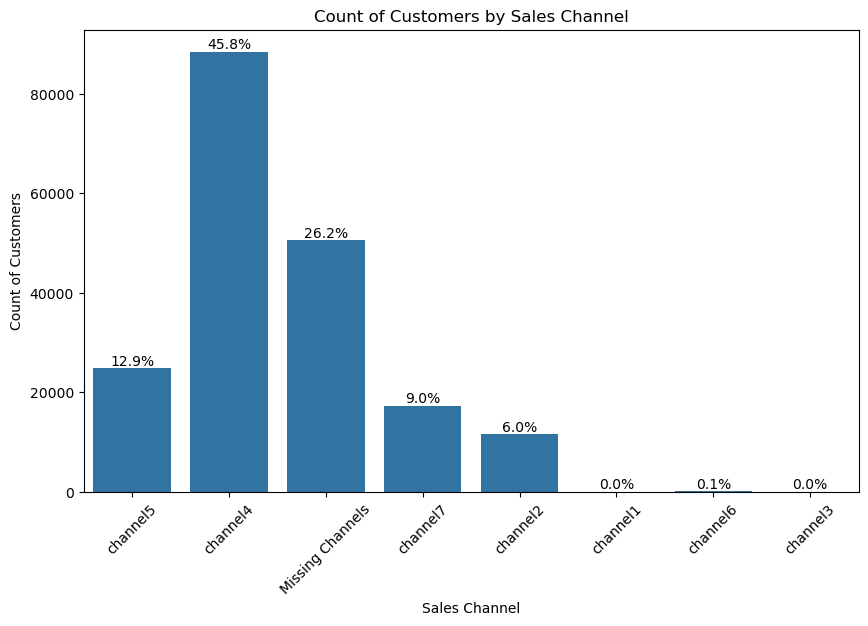

In [165]:
#Count of channel sales

plt.figure(figsize=(10, 6))

# Create the count plot
ax = sns.countplot(x='channel_sales', data=data)

# Calculate the total count
total = len(data)

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Count of Customers by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

#### Most Subscribers used channel 4 the most while channel 1,3 and 6 are the least used channels.

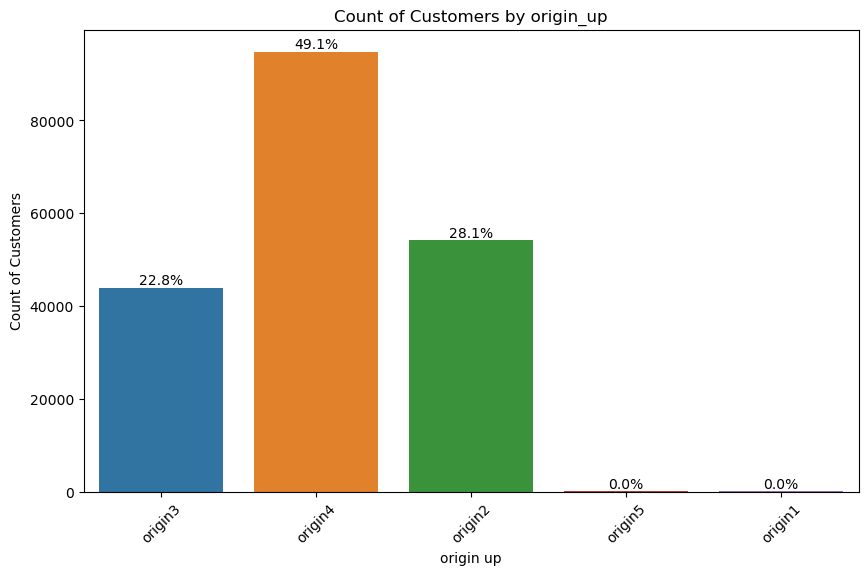

In [235]:
# Count of customers by the campaign origins

plt.figure(figsize=(10, 6))

# Create the count plot
ax = sns.countplot(x='origin_up', data=data)

# Calculate total counts for percentage calculation
total = len(data)

# Annotate each bar with the percentage
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Count of Customers by origin_up')
plt.xlabel('origin up')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.show()

#### Customers subscribed mostly through Origin 4 while Origin 1 and 5 has the least subscribers 

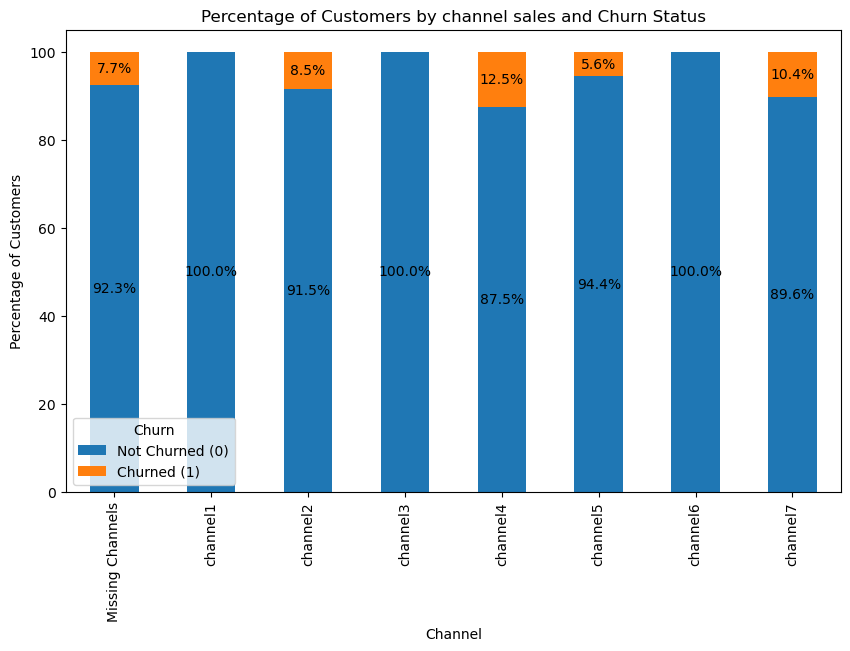

In [230]:
# To Calculate counts and percentages for each combination of origin_up and churn
channel_churn_counts = data.groupby(['channel_sales', 'churn']).size().unstack(fill_value=0)
channel_churn_percent = channel_churn_counts.div(channel_churn_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
channel_churn_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Customers by channel sales and Churn Status')
plt.xlabel('Channel')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=90)

# Add percentage labels on each bar segment
for i, channel in enumerate(channel_churn_percent.index):
    for churn_status in [0, 1]:
        percentage = channel_churn_percent.loc[channel, churn_status]
        if percentage > 0:  # Only label non-zero segments
            y_position = channel_churn_percent.loc[channel].cumsum()[churn_status] - (percentage / 2)
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center')

plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.show()

#### customers who used these different channels have proportions of customers who switched to a different subscriber 
#### to range from 5.6% at channel 5 to 12.5% at channel 4 with an exception from clients who used channel 1, 3 and 6 not churning at all.

In [234]:
# Converting the origin up to a string data type

data['origin_up'] = data['origin_up'].astype(str)

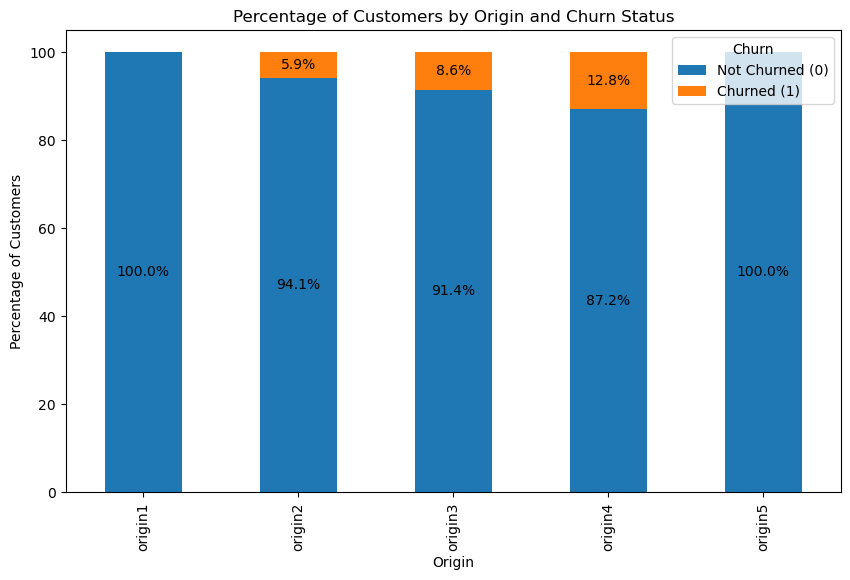

In [181]:
# Calculate counts and percentages for each combination of origin_up and churn
origin_churn_counts = data.groupby(['origin_up', 'churn']).size().unstack(fill_value=0)
origin_churn_percent = origin_churn_counts.div(origin_churn_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
origin_churn_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Customers by Origin and Churn Status')
plt.xlabel('Origin')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=90)

# Add percentage labels on each bar segment
for i, origin in enumerate(origin_churn_percent.index):
    for churn_status in [0, 1]:
        percentage = origin_churn_percent.loc[origin, churn_status]
        if percentage > 0:  # Only label non-zero segments
            y_position = origin_churn_percent.loc[origin].cumsum()[churn_status] - (percentage / 2)
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center')

plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.show()

#### customers who sunscribed to these different electicity origins have proportions of customers who switched to a different subscriber 
#### to range from 5.9% to 12.8% with an exception from clients who subscribed to origin 1 and 5 not churning at all.

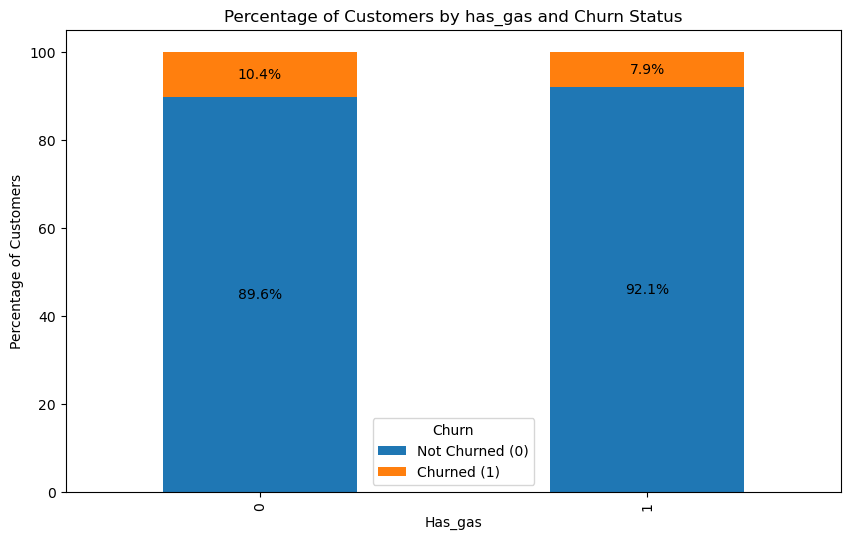

In [185]:
# Calculate counts and percentages for each combination of has_gas and churn
has_gas_churn_counts = data.groupby(['has_gas', 'churn']).size().unstack(fill_value=0)
has_gas_churn_percent = has_gas_churn_counts.div(has_gas_churn_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
has_gas_churn_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Customers by has_gas and Churn Status')
plt.xlabel('Has_gas')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=90)

# Add percentage labels on each bar segment
for i, has_gas in enumerate(has_gas_churn_percent.index):
    for churn_status in [0, 1]:
        percentage = has_gas_churn_percent.loc[has_gas, churn_status]
        if percentage > 0:  # Only label non-zero segments
            y_position = has_gas_churn_percent.loc[has_gas].cumsum()[churn_status] - (percentage / 2)
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center')

plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.show()

#### Clients that subscribed to electricity are more likely to churn than those that subscribe to electricity and gas.

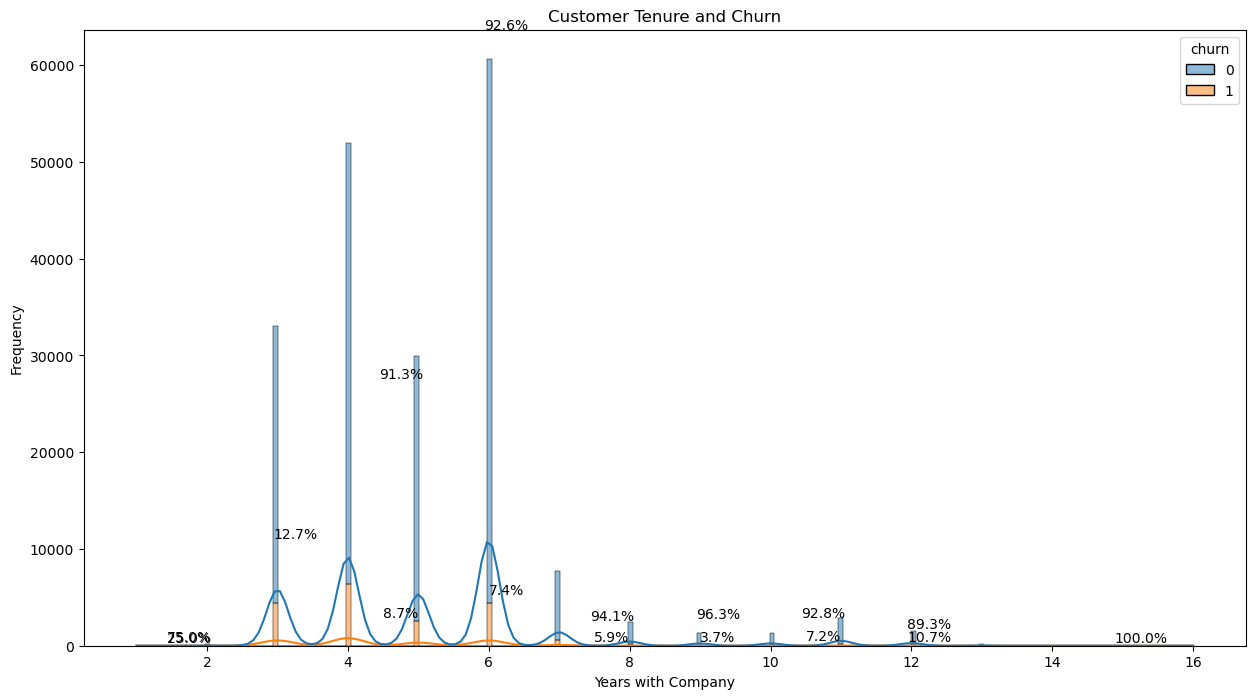

In [189]:
# Calculate bin edges for 'num_years_antig'
bin_edges = pd.cut(data['num_years_antig'], bins=10).unique().categories
data['num_years_antig_bin'] = pd.cut(data['num_years_antig'], bins=bin_edges)

# Calculate the counts and percentages for each bin and churn category
bin_counts = data.groupby(['num_years_antig_bin', 'churn']).size().unstack(fill_value=0)
bin_percentages = bin_counts.div(bin_counts.sum(axis=1), axis=0) * 100

# Plot the histogram with KDE
plt.figure(figsize=(15, 8))
ax = sns.histplot(data, x='num_years_antig', hue='churn', kde=True, multiple='stack')
plt.title('Customer Tenure and Churn')
plt.xlabel("Years with Company")
plt.ylabel("Frequency")

# Add percentage annotations on top of each bar segment
for bin_category in bin_percentages.index:
    for churn_status in [0, 1]:  # Loop through churn categories 0 and 1
        percentage = bin_percentages.loc[bin_category, churn_status]
        if percentage > 0:  # Only annotate if percentage is non-zero
            # Calculate bar position and add annotation
            x_position = bin_category.mid
            height = bin_counts.loc[bin_category, churn_status]
            ax.annotate(f'{percentage:.1f}%', (x_position, height), 
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

#### Customer that has been with the organization for 6Years and less are more likely to churn.
#### This shows that how long a customer has been with the organization really determines if they'll churn or not.

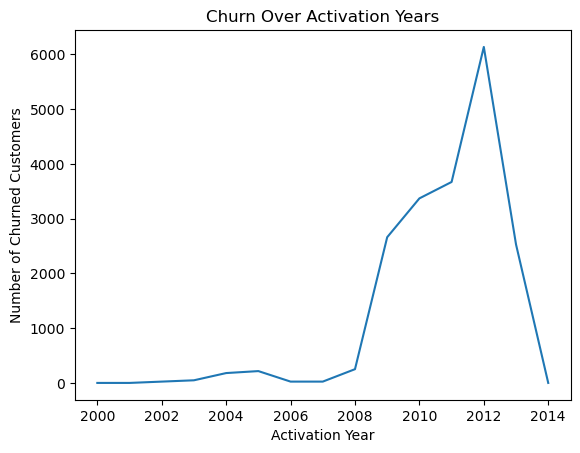

In [55]:
#Viewing activation years of when customers churning 

data['date_activ'] = pd.to_datetime(data['date_activ'])
data['tenure_year'] = data['date_activ'].dt.year
churn_by_year = data.groupby('tenure_year')['churn'].sum()
churn_by_year.plot(kind='line', title='Churn Over Activation Years')
plt.xlabel("Activation Year")
plt.ylabel("Number of Churned Customers")
plt.show()

#### Customers that joins in recent years have higher rate of churning showing the highest increase in 2012

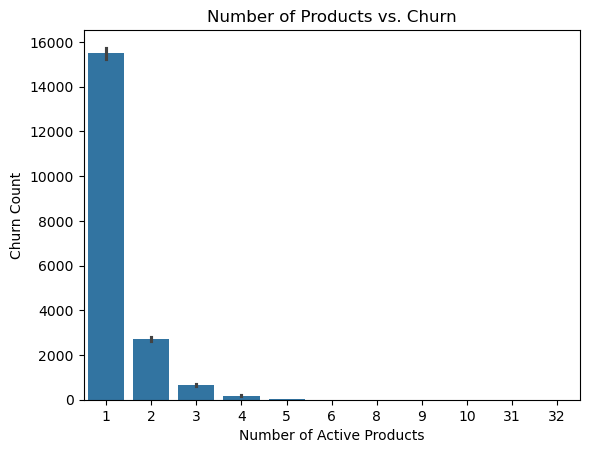

In [275]:
# To view active products for customers with respect to churn

sns.barplot(x='nb_prod_act', y='churn', data=data, estimator=sum)
plt.title('Number of Products vs. Churn')
plt.xlabel("Number of Active Products")
plt.ylabel("Churn Count")
plt.show()

#### Most of the churned customers have 1 to 2 active products though some had 3 to 4 but are very minimal.

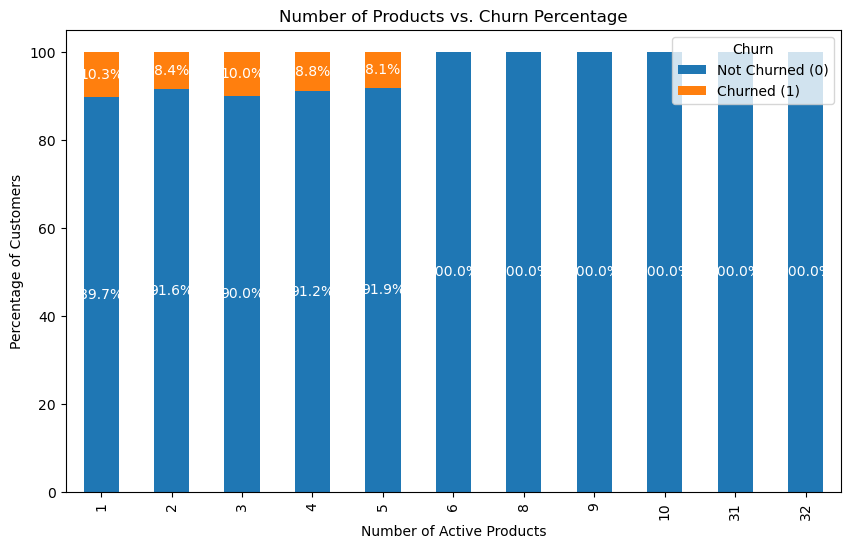

In [193]:
# Calculate counts for each combination of 'nb_prod_act' and 'churn'
nb_prod_act_churn_counts = data.groupby(['nb_prod_act', 'churn']).size().unstack(fill_value=0)

# Calculate the churn percentage for each 'nb_prod_act' value
nb_prod_act_churn_percent = nb_prod_act_churn_counts.div(nb_prod_act_churn_counts.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
nb_prod_act_churn_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title('Number of Products vs. Churn Percentage')
plt.xlabel("Number of Active Products")
plt.ylabel("Percentage of Customers")

# Add percentage labels to each bar segment
for i, nb_prod_act in enumerate(nb_prod_act_churn_percent.index):
    for churn_status, percentage in enumerate(nb_prod_act_churn_percent.loc[nb_prod_act]):
        if percentage > 0:  # Only add labels for non-zero segments
            y_position = nb_prod_act_churn_percent.loc[nb_prod_act].cumsum()[churn_status] - (percentage / 2)
            ax.text(i, y_position, f'{percentage:.1f}%', ha='center', va='center', color='white')

# Legend for churn status
plt.legend(title='Churn', labels=['Not Churned (0)', 'Churned (1)'])
plt.show()

#### Customers with 1 to 5 active products churned with a proportion ranging from 8.1% to 10.3%
#### While those with over 5 active products did not churn.

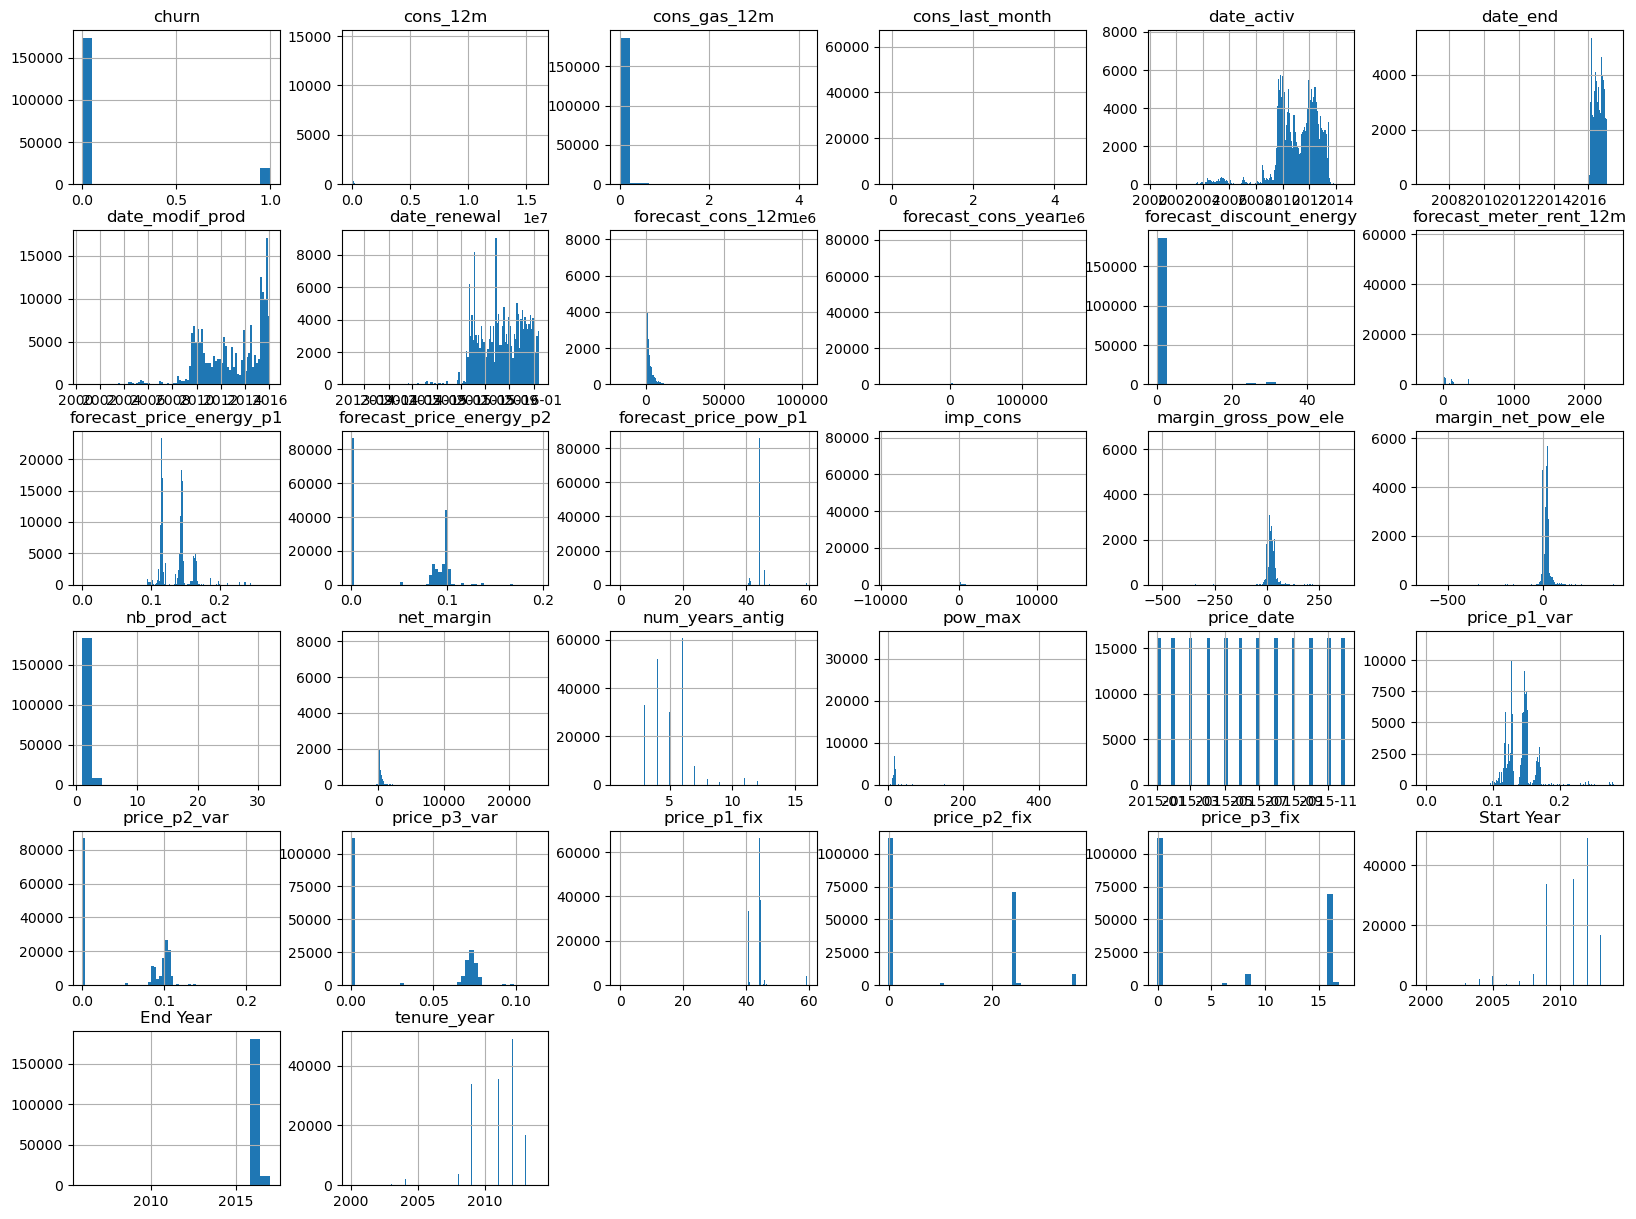

In [277]:
data.hist(figsize=(20, 15), bins="auto")
plt.show()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        193002 non-null  object        
 1   churn                     193002 non-null  int64         
 2   channel_sales             193002 non-null  object        
 3   cons_12m                  193002 non-null  int64         
 4   cons_gas_12m              193002 non-null  int64         
 5   cons_last_month           193002 non-null  int64         
 6   date_activ                193002 non-null  datetime64[ns]
 7   date_end                  193002 non-null  datetime64[ns]
 8   date_modif_prod           193002 non-null  datetime64[ns]
 9   date_renewal              193002 non-null  datetime64[ns]
 10  forecast_cons_12m         193002 non-null  float64       
 11  forecast_cons_year        193002 non-null  int64         
 12  fo

In [109]:
data.head(10)

,id,churn,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,Start Year,End Year
0,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,2012,2016
1,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,2012,2016
2,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,2012,2016
3,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,2012,2016
4,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.334260,2012,2016
5,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-06-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,2012,2016
6,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-07-01,0.106043,0.093474,0.067378,58.936780,36.344721,8.334263,2012,2016
7,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-08-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,2012,2016
8,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-09-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,2012,2016
9,48ada52261e7cf58715202705a0451c9,0,channel5,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,...,180.0,2015-10-01,0.100248,0.090359,0.067378,58.936780,36.344721,8.334263,2012,2016


In [111]:
data['Start Year'].nunique()

14

## Analyzing using the price features and Plotting of the corresponding visuals

#### Calculating maximum, minimum and average prices over the whole year

In [113]:
# Defininng statistics to compute and the price columns to analyze
stat_ = ['max', 'min', 'mean']
price_attr = ['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']

# Group by 'id' and calculate statistics for each price attribute
price_stat = data.drop(columns=['price_date']).groupby('id').agg({
    'price_p1_var': stat_,
    'price_p2_var': stat_,
    'price_p3_var': stat_,
    'price_p1_fix': stat_,
    'price_p2_fix': stat_,
    'price_p3_fix': stat_
})

# Flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()

# Add the churn column by taking the first churn value for each 'id' (if there are duplicates)
churn_by_id = data.groupby('id')['churn'].first()
price_stat['churn'] = price_stat['id'].map(churn_by_id)

# Display the first few rows
price_stat.head(3)

,id,price_p1_var_max,price_p1_var_min,price_p1_var_mean,price_p2_var_max,price_p2_var_min,price_p2_var_mean,price_p3_var_max,price_p3_var_min,price_p3_var_mean,price_p1_fix_max,price_p1_fix_min,price_p1_fix_mean,price_p2_fix_max,price_p2_fix_min,price_p2_fix_mean,price_p3_fix_max,price_p3_fix_min,price_p3_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0


### Calculating the difference in price over the year

In [115]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']

# Display the first few rows
price_stat.head(3)

,id,price_p1_var_max,price_p1_var_min,price_p1_var_mean,price_p2_var_max,price_p2_var_min,price_p2_var_mean,price_p3_var_max,price_p3_var_min,price_p3_var_mean,...,price_p3_fix_max,price_p3_fix_min,price_p3_fix_mean,churn,diff_max_min_price_p1_var,diff_max_min_price_p2_var,diff_max_min_price_p3_var,diff_max_min_price_p1_fix,diff_max_min_price_p2_fix,diff_max_min_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,16.291555,16.226389,16.280694,0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


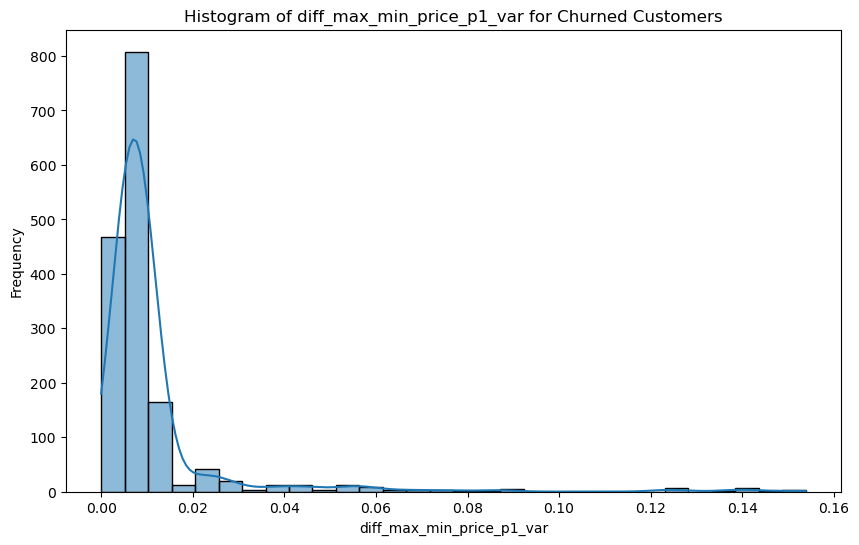

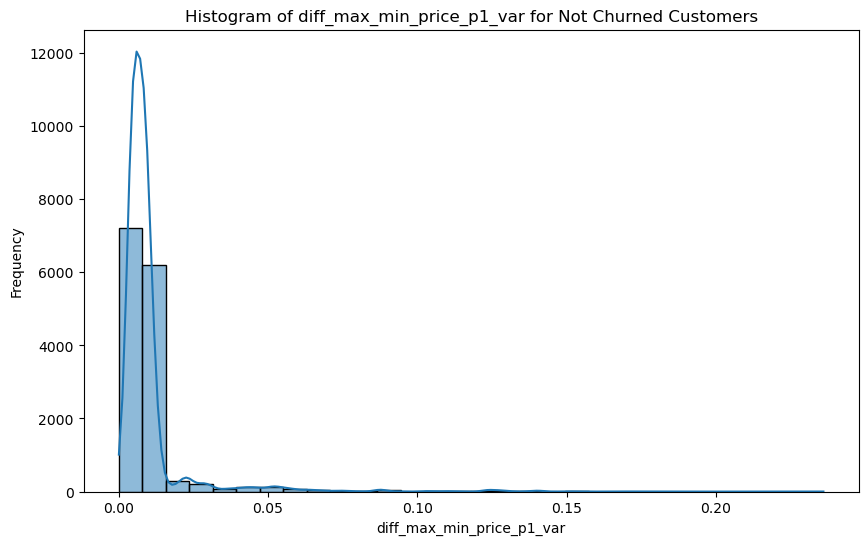

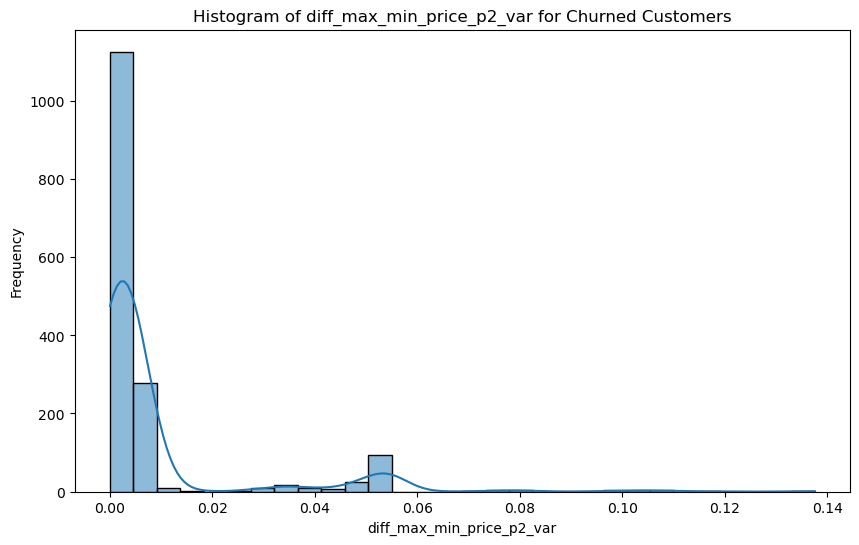

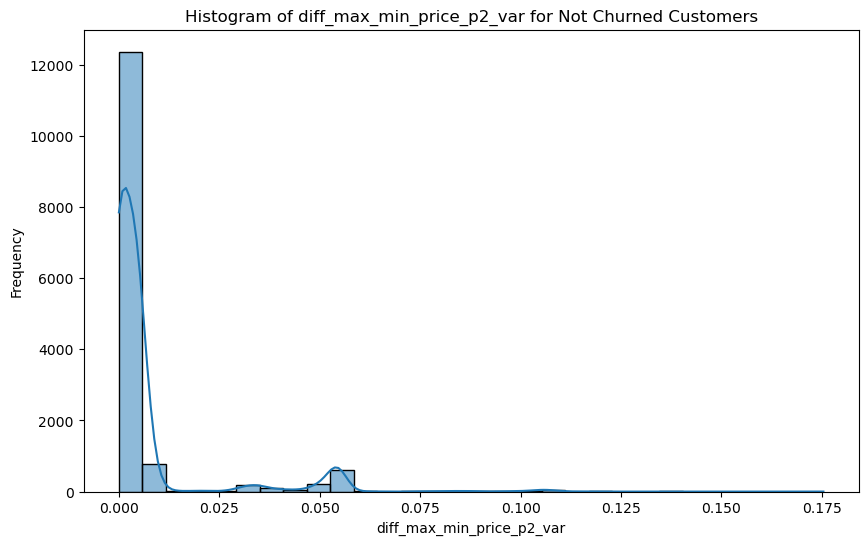

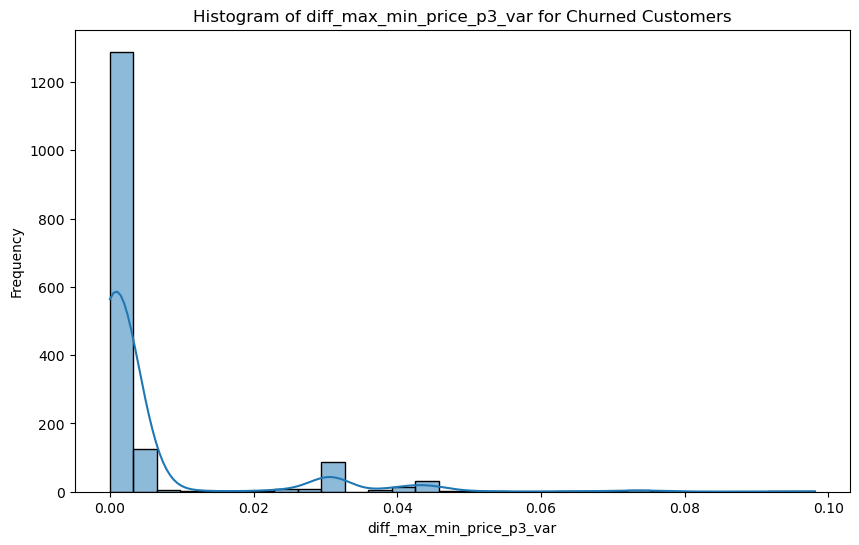

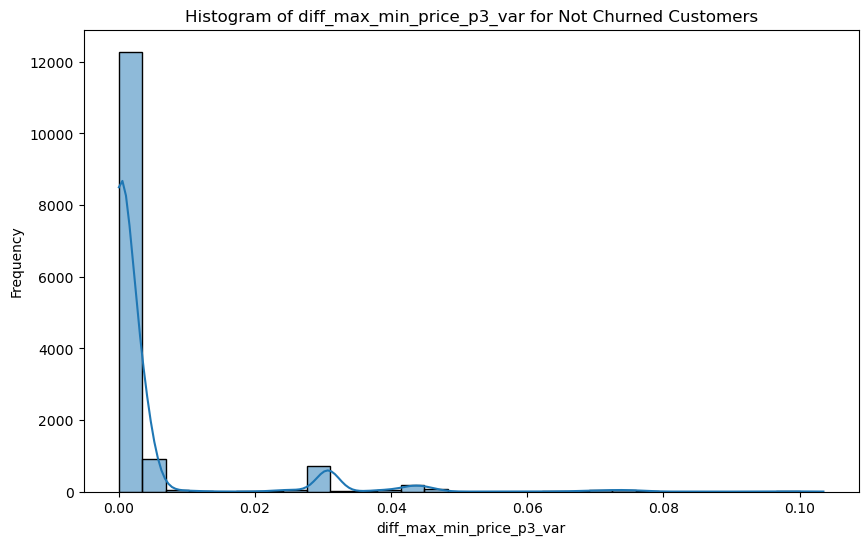

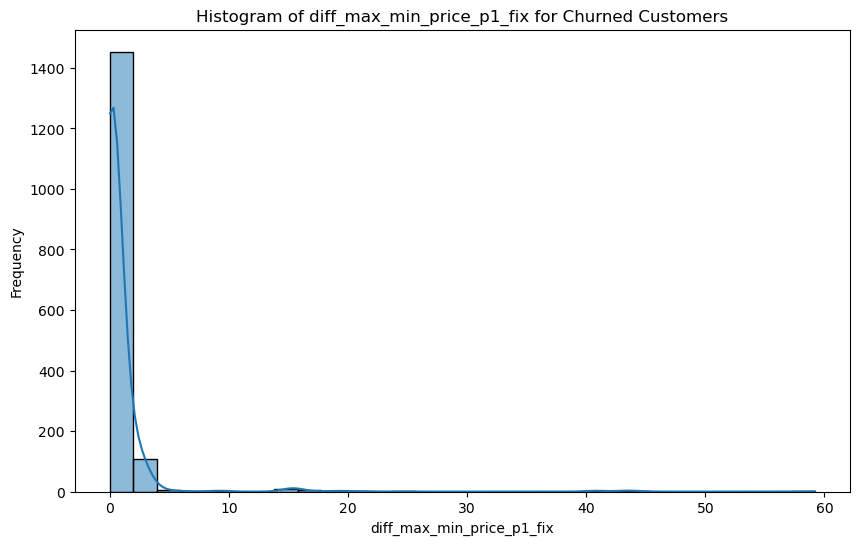

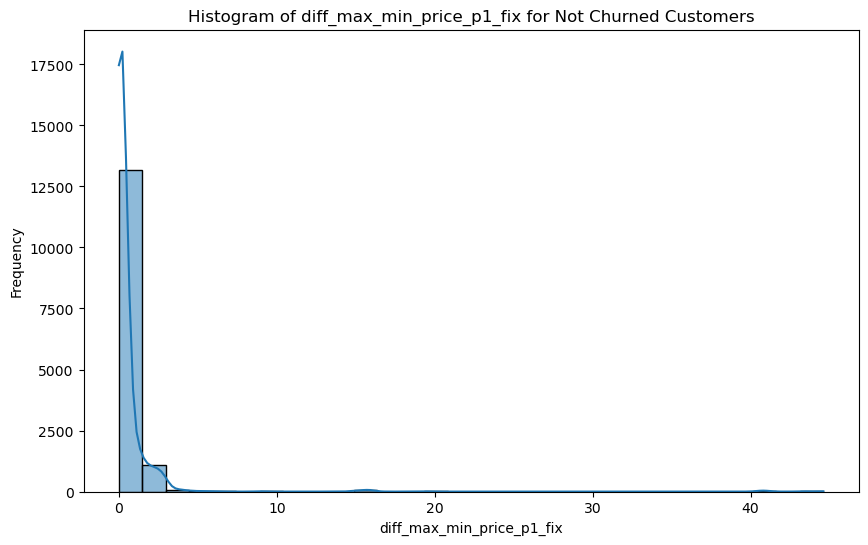

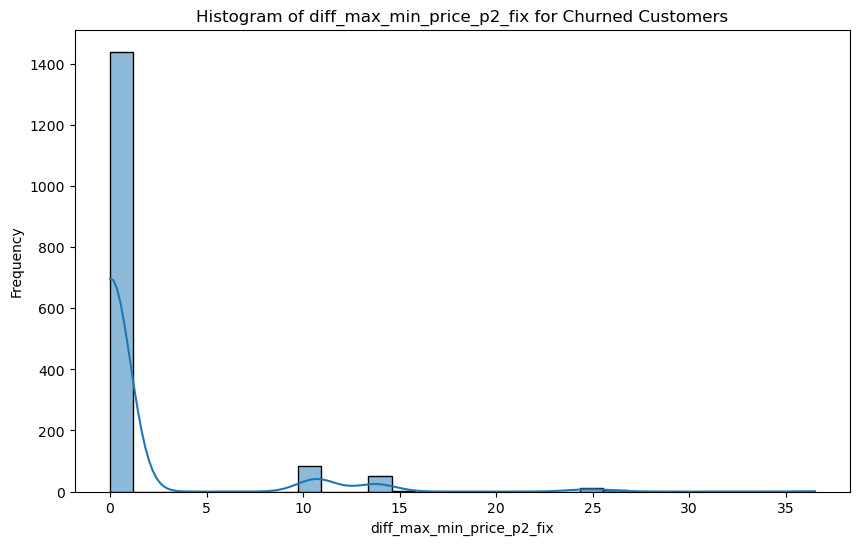

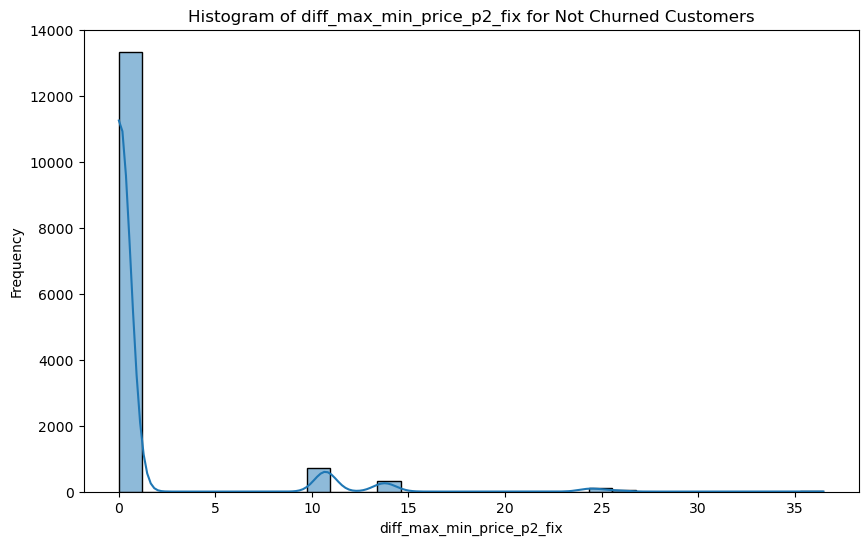

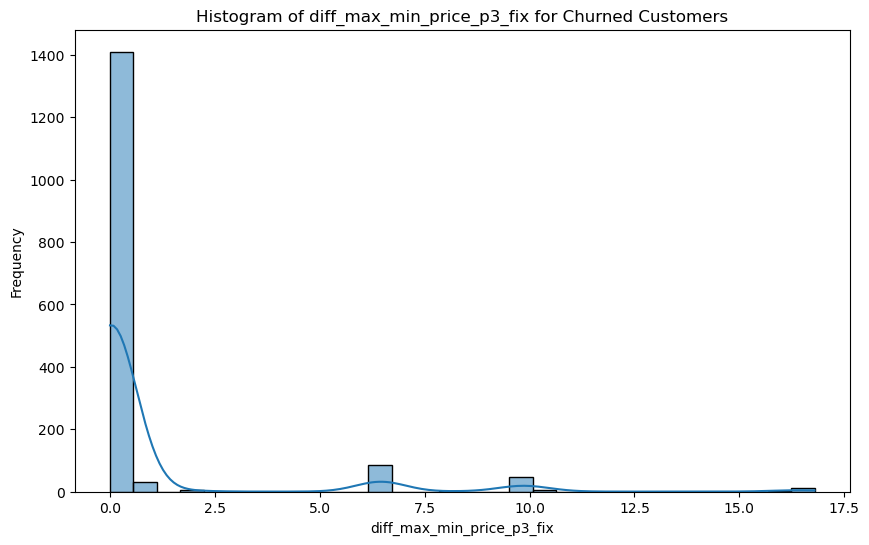

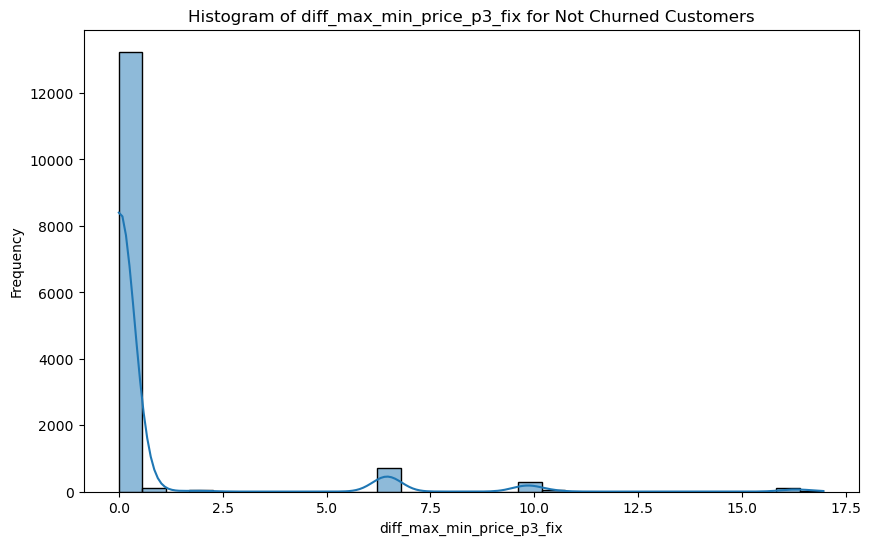

In [123]:
# A function to plot histograms by churn status
def plot_histogram_by_churn(df, target_variable, if_churn=True):
    # Filter data based on churn status
    churn_status = 1 if if_churn else 0
    filtered_data = df[df['churn'] == churn_status]
    
    # Plot histogram for the specified target variable
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_data[target_variable], bins=30, kde=True)
    status = 'Churned' if churn_status == 1 else 'Not Churned'
    plt.title(f'Histogram of {target_variable} for {status} Customers')
    plt.xlabel(target_variable)
    plt.ylabel('Frequency')
    plt.show()

# Define price attributes and create diff_max_min columns
price_attr = ['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix']
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']

# Call the function for each max-min difference column
for attr in price_attr:
    target_variable = f'diff_max_min_{attr}'
    if target_variable in price_stat.columns:
        plot_histogram_by_churn(df=price_stat, target_variable=target_variable, if_churn=True)
        plot_histogram_by_churn(df=price_stat, target_variable=target_variable, if_churn=False)

### Calculating the difference between the price for last month(December) and the mean price

In [125]:
# adding difference
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = data[data['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

,id,price_p1_var_max,price_p1_var_min,price_p1_var_mean,price_p2_var_max,price_p2_var_min,price_p2_var_mean,price_p3_var_max,price_p3_var_min,price_p3_var_mean,...,diff_max_min_price_p3_var,diff_max_min_price_p1_fix,diff_max_min_price_p2_fix,diff_max_min_price_p3_fix,diff_Dec_mean_price_p1_var,diff_Dec_mean_price_p2_var,diff_Dec_mean_price_p3_var,diff_Dec_mean_price_p1_fix,diff_Dec_mean_price_p2_fix,diff_Dec_mean_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,-0.026247,-0.014169,-0.007424,18.471736,12.069651,-7.912963
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.005435,0.054412,0.030712,-1.059904,10.698201,6.455436
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,-0.033958,0.000000,0.000000,-0.875000,0.000000,0.000000


#### From the result the price for last month is almost the same with the mean price for the entire year

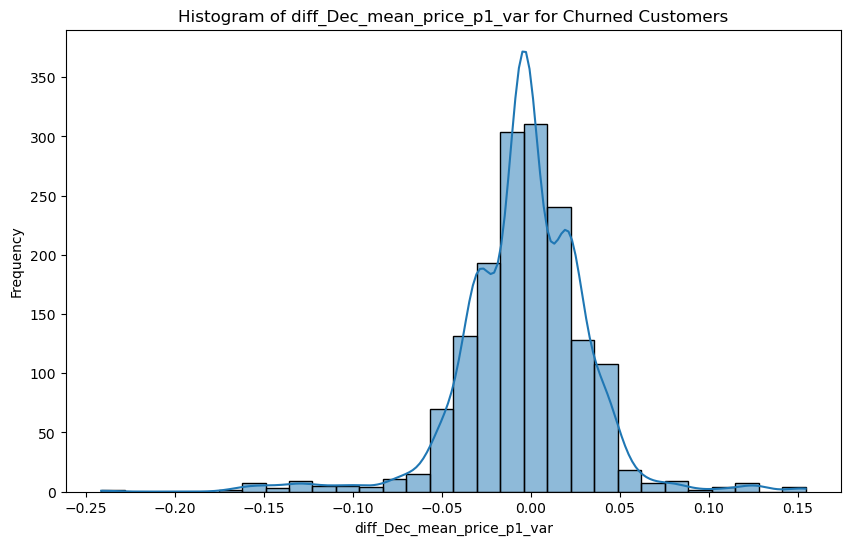

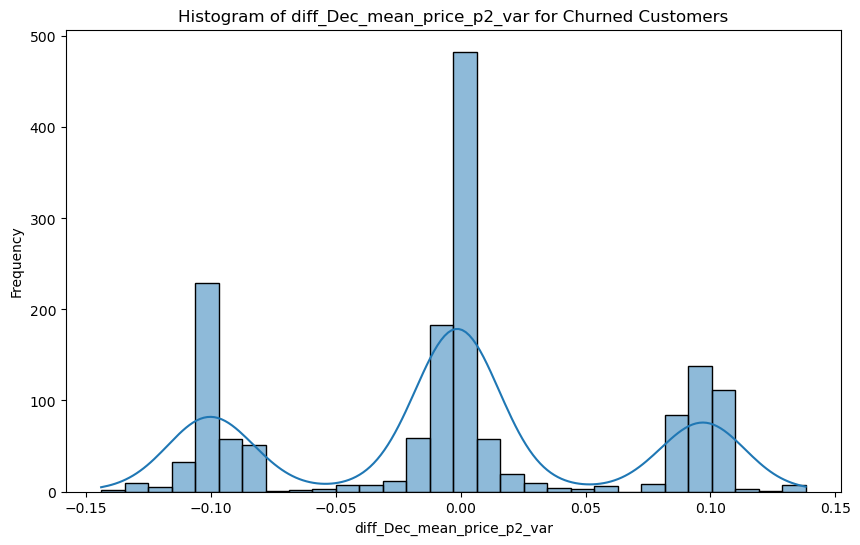

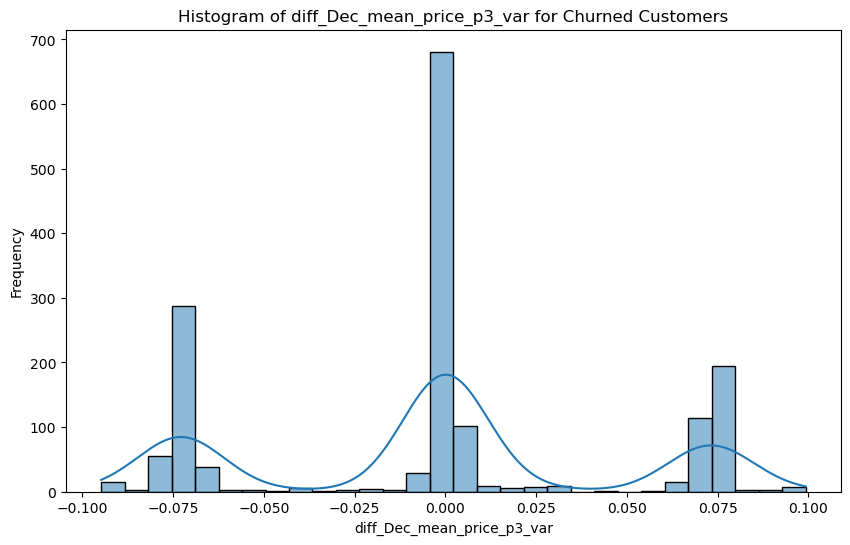

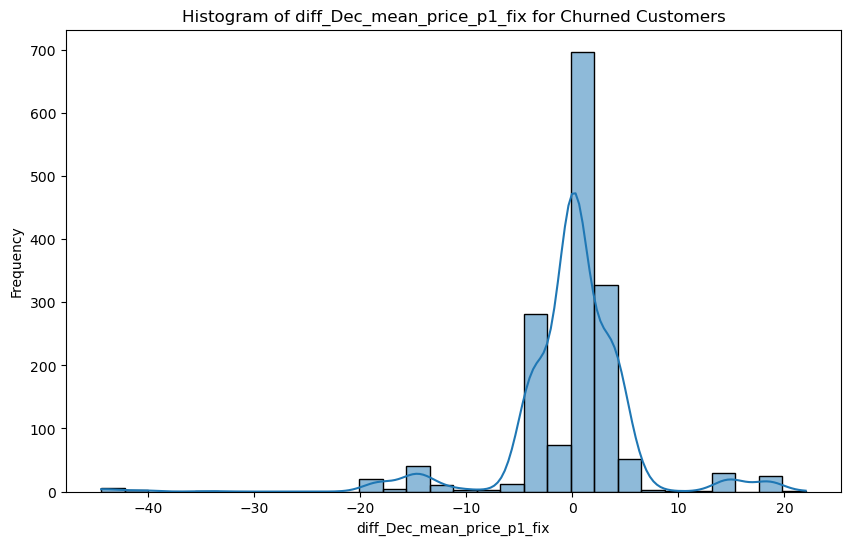

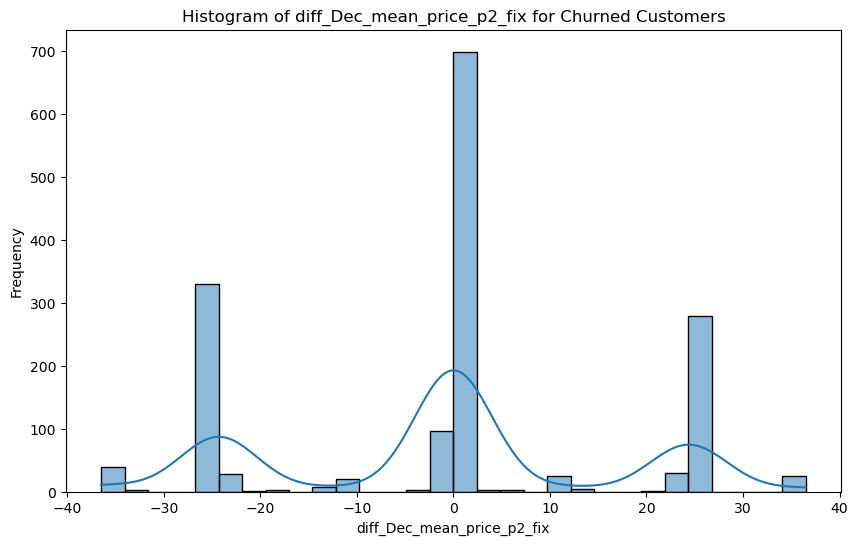

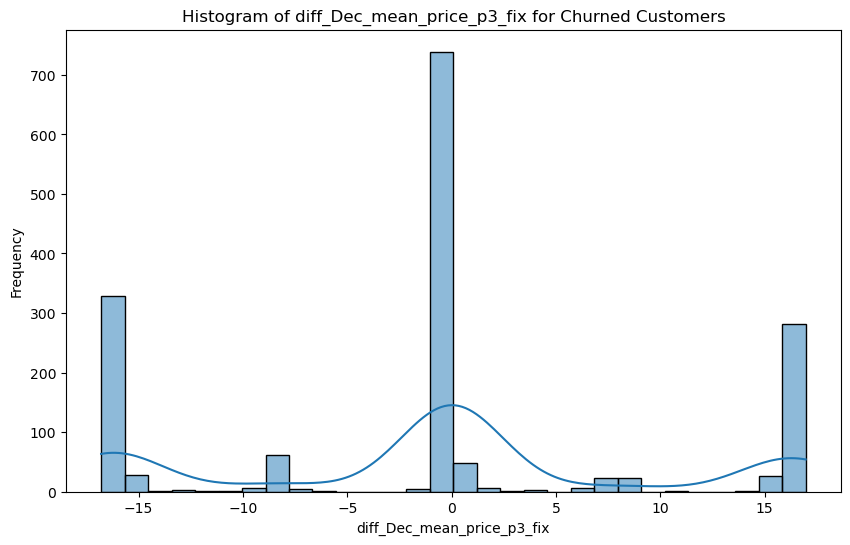

In [127]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

### To confirm if the changes in price affects the churn rate

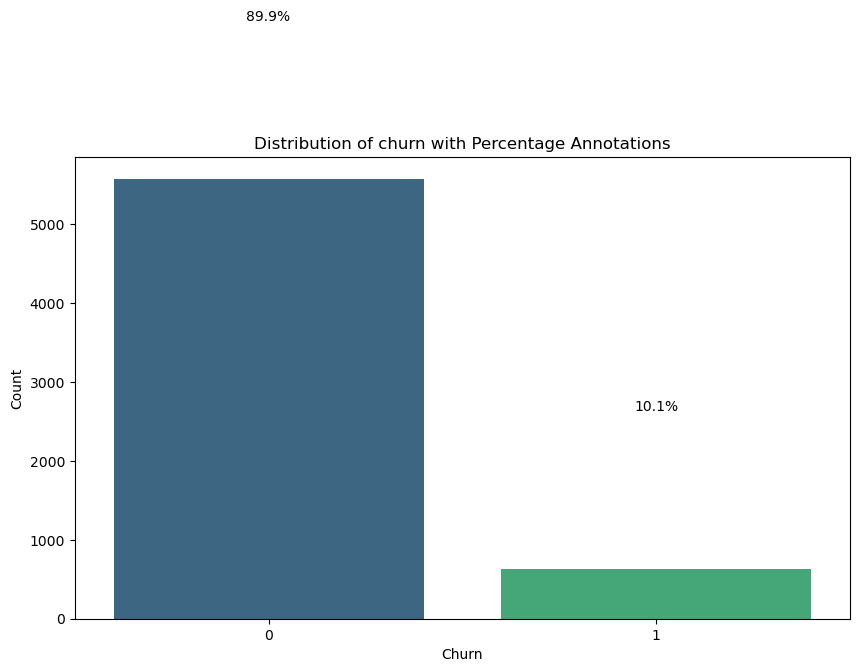

In [129]:
def plot_bar_chart_with_percent_label(df,target_variable, gap_label_bar=0.02):
    
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=target_variable, data=df, palette='viridis')
    plt.title(f'Distribution of {target_variable} with Percentage Annotations')
    plt.xlabel(target_variable.capitalize())
    plt.ylabel('Count')

    # Calculate the total number of records for percentage calculation
    total = len(df)

    # Add percentage labels to the bars
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        if count > 0:  # Add label only if the bar has height
            ax.annotate(f'{percentage:.1f}%', 
                        (p.get_x() + p.get_width() / 2., count), 
                        ha='center', va='bottom', 
                        xytext=(0, gap_label_bar * max(df[target_variable].value_counts())), 
                        textcoords='offset points')

    plt.show()

# For data where 'diff_Dec_mean_price_p1_var' > 0
plot_bar_chart_with_percent_label(
    df=price_stat[price_stat['diff_Dec_mean_price_p1_var'] > 0],
    target_variable='churn',
    gap_label_bar=0.02
)

#### This shows that for customers that offpeak energy price affected i.e increased
#### about 10.1% of the subscribers switched to another service provider

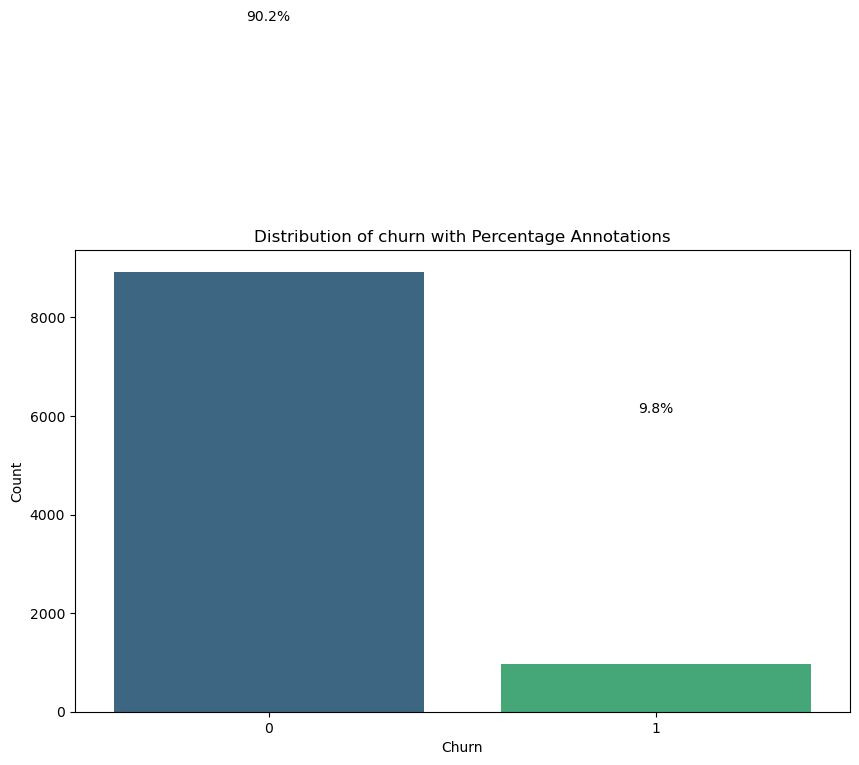

In [131]:
# For data where 'diff_Dec_mean_price_p1_var' <= 0
plot_bar_chart_with_percent_label(
    df=price_stat[price_stat['diff_Dec_mean_price_p1_var'] <= 0],
    target_variable='churn',
    gap_label_bar=0.02
)

#### This shows that for customers that the off peak energy price didnt affect i.e did not increase
#### about 9.8% of the subscribers switched to another service provider

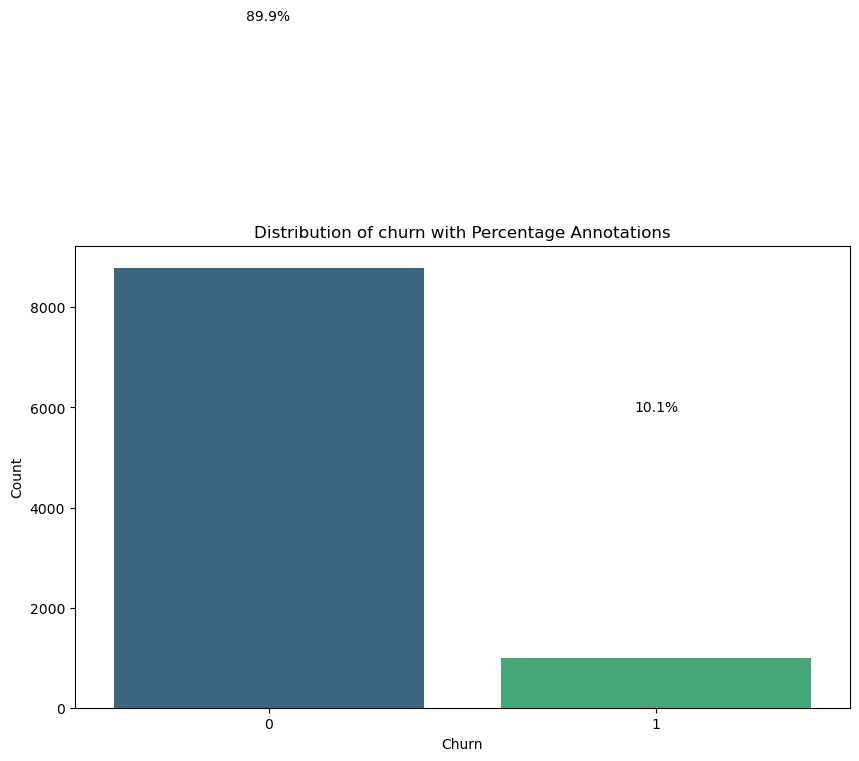

In [133]:
plot_bar_chart_with_percent_label(
    df=price_stat[price_stat['diff_Dec_mean_price_p1_fix']>0],
    target_variable='churn', 
    gap_label_bar=0.02 
)

#### Customers whose off peak power price increased
#### About 10.1% switched to another service provider

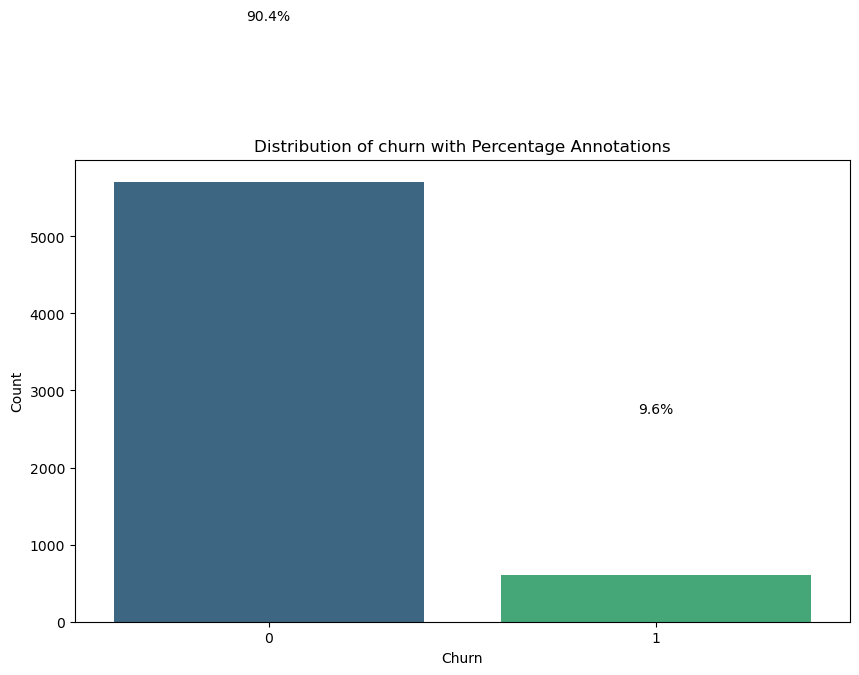

In [135]:
plot_bar_chart_with_percent_label(
    df=price_stat[price_stat['diff_Dec_mean_price_p1_fix']<=0], 
    target_variable='churn',
    gap_label_bar=0.02)

#### Customers whose off peak power price did not increase
#### About 9.6% switched to another service provider

In [117]:
# Define statistics to compute
stat_ = ['max', 'min', 'mean']
price_attr = ['price_p1_var', 'price_p2_var', 'price_p3_var', 
              'price_p1_fix', 'price_p2_fix', 'price_p3_fix']

# Filter the data for the last six months based on 'price_date'
price_stat_6_month = data[data['price_date'] > '2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({
    'price_p1_var': stat_,
    'price_p2_var': stat_,
    'price_p3_var': stat_,
    'price_p1_fix': stat_,
    'price_p2_fix': stat_,
    'price_p3_fix': stat_,
})

# Flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()

# Calculate the last available price values for comparison
for attr in price_attr:
    # Ensure the values are calculated from the original dataset filtered by 'id' present in the current group
    last_values = data[data['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values
    mean_values = price_stat_6_month[f'{attr}_mean'].values
    
    # Calculate the difference and add it as a new column
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = last_values - mean_values

# Display the first few rows
price_stat_6_month.head(5)

,id,price_p1_var_max,price_p1_var_min,price_p1_var_mean,price_p2_var_max,price_p2_var_min,price_p2_var_mean,price_p3_var_max,price_p3_var_min,price_p3_var_mean,...,price_p2_fix_mean,price_p3_fix_max,price_p3_fix_min,price_p3_fix_mean,diff_Dec_mean_price_p1_var,diff_Dec_mean_price_p2_var,diff_Dec_mean_price_p3_var,diff_Dec_mean_price_p1_fix,diff_Dec_mean_price_p2_fix,diff_Dec_mean_price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,0.105842,0.101673,0.102368,0.073773,0.073719,0.073728,...,24.43733,16.291555,16.291555,16.291555,-0.023175,-0.012743,-0.007992,18.444583,12.053359,-7.923824
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,-0.003695,0.054412,0.030712,-1.119164,10.698201,6.455436
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,-0.054424,0.000000,0.000000,-1.500000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.121229,0.113068,0.114428,0.099554,0.095385,0.096080,0.069463,0.069409,0.069418,...,24.43733,16.291555,16.291555,16.291555,0.053370,-0.007671,-0.069418,3.715825,-24.437330,-16.291555
4,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.002402,0.000000,0.000000,0.177780,0.000000,0.000000


#### From the analysis above it shows that price has no significant effect in the churning rate
#### has the rate is still about 10%
#### i.e. There is no difference in the rate at which customers churn when price is being considered.
#### This means that price is not the major factor for customers churning.
#### Therefore, customers are not sensitive to price. 

## Dropping Features that are highly correlated and irrelevant to the model

In [54]:
data = data.drop(columns=['margin_net_pow_ele','imp_cons','cons_last_month','id',
                          'forecast_meter_rent_12m','cons_12m','cons_gas_12m','forecast_cons_12m'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   churn                     193002 non-null  int64         
 1   channel_sales             193002 non-null  object        
 2   date_activ                193002 non-null  datetime64[ns]
 3   date_end                  193002 non-null  datetime64[ns]
 4   date_modif_prod           193002 non-null  datetime64[ns]
 5   date_renewal              193002 non-null  datetime64[ns]
 6   forecast_cons_year        193002 non-null  int64         
 7   forecast_discount_energy  193002 non-null  float64       
 8   forecast_price_energy_p1  193002 non-null  float64       
 9   forecast_price_energy_p2  193002 non-null  float64       
 10  forecast_price_pow_p1     193002 non-null  float64       
 11  has_gas                   193002 non-null  object        
 12  ma

In [56]:
#Creating a copy of the data after dropping irrelevant features

data2 = data.copy()

In [57]:
data2.head()

,churn,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,...,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,Start Year,End Year
0,0,channel5,2012-11-07,2016-11-06,2012-11-07,2015-11-09,10025,0.0,0.095919,0.088347,...,180.0,2015-01-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,2012,2016
1,0,channel5,2012-11-07,2016-11-06,2012-11-07,2015-11-09,10025,0.0,0.095919,0.088347,...,180.0,2015-02-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,2012,2016
2,0,channel5,2012-11-07,2016-11-06,2012-11-07,2015-11-09,10025,0.0,0.095919,0.088347,...,180.0,2015-03-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,2012,2016
3,0,channel5,2012-11-07,2016-11-06,2012-11-07,2015-11-09,10025,0.0,0.095919,0.088347,...,180.0,2015-04-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,2012,2016
4,0,channel5,2012-11-07,2016-11-06,2012-11-07,2015-11-09,10025,0.0,0.095919,0.088347,...,180.0,2015-05-01,0.106043,0.093474,0.067378,58.936774,36.344726,8.33426,2012,2016


### Label Encoding 

In [58]:
#Storing the LabelEncoder() in a variable called Encoder

encoder = LabelEncoder()

In [59]:
data['channel_sales'] = encoder.fit_transform(data['channel_sales'])

In [60]:
data['date_activ'] = encoder.fit_transform(data['date_activ'])

In [61]:
data['date_end'] = encoder.fit_transform(data['date_end'])

In [62]:
data['date_modif_prod'] = encoder.fit_transform(data['date_modif_prod'])

In [63]:
data['date_renewal'] = encoder.fit_transform(data['date_renewal'])

In [64]:
data['origin_up'] = encoder.fit_transform(data['origin_up'])

In [65]:
data['forecast_cons_year'] = encoder.fit_transform(data['forecast_cons_year'])

In [66]:
data['pow_max'] = encoder.fit_transform(data['pow_max'])

In [67]:
data['price_p1_var'] = encoder.fit_transform(data['price_p1_var'])

In [68]:
data['price_p2_var'] = encoder.fit_transform(data['price_p2_var'])

In [69]:
data['price_p3_var'] = encoder.fit_transform(data['price_p3_var'])

In [70]:
data['price_p1_fix'] = encoder.fit_transform(data['price_p1_fix'])

In [71]:
data['price_p2_fix'] = encoder.fit_transform(data['price_p2_fix'])

In [72]:
data['price_p3_fix'] = encoder.fit_transform(data['price_p3_fix'])

In [73]:
data['Start Year'] = encoder.fit_transform(data['Start Year'])

In [74]:
data['End Year'] = encoder.fit_transform(data['End Year'])

In [75]:
data['price_date'] = encoder.fit_transform(data['price_date'])

## Model Development

### Splitting of the dataset into training and testing

In [76]:
x = data.drop("churn", axis=1)
y=data['churn']

In [77]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 193002 entries, 0 to 193001
Series name: churn
Non-Null Count   Dtype
--------------   -----
193002 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB


In [78]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   channel_sales             193002 non-null  int32  
 1   date_activ                193002 non-null  int64  
 2   date_end                  193002 non-null  int64  
 3   date_modif_prod           193002 non-null  int64  
 4   date_renewal              193002 non-null  int64  
 5   forecast_cons_year        193002 non-null  int64  
 6   forecast_discount_energy  193002 non-null  float64
 7   forecast_price_energy_p1  193002 non-null  float64
 8   forecast_price_energy_p2  193002 non-null  float64
 9   forecast_price_pow_p1     193002 non-null  float64
 10  has_gas                   193002 non-null  object 
 11  margin_gross_pow_ele      193002 non-null  float64
 12  nb_prod_act               193002 non-null  int64  
 13  net_margin                193002 non-null  f

In [79]:
# Splitting the data into 70% of the dataset for model training and 30% for testing the accuracy of the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [80]:
x_train

,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,Start Year,End Year
191578,4,1115,286,2211,334,25,0.000000,0.142881,0.000000,45.806878,...,37,3,1205,0,0,36,2,2,9,2
19142,4,1628,101,2105,72,25,0.000000,0.158850,0.081596,44.311378,...,116,2,1580,182,0,36,2,2,11,2
47309,7,1750,299,1484,345,25,0.000000,0.147506,0.000000,46.305378,...,37,10,1096,0,0,35,2,2,11,2
149578,4,1953,191,1502,255,25,0.000000,0.143166,0.000000,44.311378,...,135,4,1141,0,0,36,2,2,12,2
175709,0,478,247,326,305,4419,0.000000,0.097634,0.090062,58.995952,...,243,9,85,425,325,62,28,10,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,4,1569,94,1322,194,570,0.000000,0.145711,0.000000,44.311378,...,85,8,1079,0,0,38,2,2,11,2
103694,2,1704,248,1441,308,25,0.000000,0.145711,0.000000,44.311378,...,116,8,1074,0,0,38,2,2,11,2
131932,2,1031,185,819,250,25,0.000000,0.143166,0.000000,44.311378,...,101,5,1141,0,0,35,2,2,9,2
146867,4,1464,339,1224,377,3750,0.991953,0.135906,0.052945,43.533283,...,396,3,662,966,498,19,14,18,11,3


In [81]:
x_test

,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_year,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,Start Year,End Year
173244,4,769,239,2157,300,25,0.0,0.141434,0.000000,44.311378,...,95,10,869,0,0,38,2,2,8,2
31940,0,825,302,626,348,1590,0.0,0.115237,0.100123,40.606701,...,199,1,662,966,498,19,14,18,8,2
85663,2,933,71,724,177,25,0.0,0.146694,0.000000,44.311378,...,101,8,1128,0,0,38,2,2,9,2
133357,5,1503,22,2278,147,2044,0.0,0.142648,0.000000,44.311378,...,116,2,1029,0,0,36,2,2,11,2
100602,4,1591,40,1802,157,3323,0.0,0.142065,0.000000,44.311378,...,101,10,871,0,0,35,2,2,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,4,1413,280,2118,330,2140,0.0,0.116509,0.101397,40.606701,...,404,7,393,769,492,20,13,16,10,2
43049,5,1748,296,1482,342,25,0.0,0.095919,0.088347,58.995952,...,691,7,34,341,101,62,28,10,11,2
67793,4,1861,61,1585,169,25,0.0,0.146694,0.000000,44.311378,...,116,7,1128,0,0,38,2,2,12,2
100622,7,1743,291,2243,338,25,0.0,0.115939,0.100823,40.606701,...,226,6,708,1010,569,20,13,16,11,2


In [82]:
y_train

191578    0
19142     0
47309     1
149578    1
175709    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: churn, Length: 135101, dtype: int64

In [83]:
y_test

173244    0
31940     0
85663     0
133357    0
100602    0
         ..
130152    0
43049     0
67793     0
100622    0
62589     0
Name: churn, Length: 57901, dtype: int64

## Model Evaluation

In [85]:
#pipeline for cross validation

models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("RF", RandomForestClassifier()))

In [199]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    # train the model
    cv_results = cross_val_score(
        model, x_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.900053 (0.002828)
KNN: 0.955308 (0.002476)
CART: 0.999452 (0.000199)
NB: 0.823680 (0.007373)
RF: 0.999748 (0.000196)


#### Random Forest Model has the highest score from the different range of model used with the trained data
#### Therefore, we will be using random forest model for the prediction of customer churn with the test data

### Random forest Algorithm

In [88]:
#random forest to enable us view accuracy, precision, f1 score

Random_model=RandomForestClassifier(random_state=42)
Random_model.fit(x_train,y_train)
y_pred=Random_model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

0.9998791039878413
0.9998790706013
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52246
           1       1.00      1.00      1.00      5655

    accuracy                           1.00     57901
   macro avg       1.00      1.00      1.00     57901
weighted avg       1.00      1.00      1.00     57901



#### The accuracy of the model prediction is perfect because the dataset provided for training was perfect,
#### having 90% of a dataset to be accurate will make it easy for the model to learn and predict test dataset accurately
#### since it already learned with the best data at the training stage.
#### There wouldn't be a need to run a grid search in improving the model since it already has 100% accuracy.

In [90]:
# Confusion Matrix 

#print confusion matrix

confusion_matrix(y_test, y_pred)

array([[52246,     0],
       [    7,  5648]], dtype=int64)

#### From the confusion matrix 
#### True Positive resulted in 52246  which means the model predicted this number of people will stay and they truly did.
#### False Negative resulted in 0 which means the model predicted that 0 people would churn but they stayed.
#### False Positive resulted in 7 which means the model predicted 7 customers will stay but they churned.
#### True Negative resulted in 5648 which means the model predicted this customers will churn and they truly did.
#### From the analysis given, we can conclude that our model was able to give a good amount of prediction


In [86]:
feature_importances = pd.DataFrame({"feature":x_train.columns,
                                    "importance":Random_model.feature_importances_


}).sort_values(by = "importance",ascending=True).reset_index()
feature_importances

,index,feature,importance
0,22,price_p2_fix,0.003822
1,23,price_p3_fix,0.003874
2,17,price_date,0.004212
3,25,End Year,0.004546
4,6,forecast_discount_energy,0.005390
5,21,price_p1_fix,0.008675
6,10,has_gas,0.008914
7,19,price_p2_var,0.013360
8,20,price_p3_var,0.013460
9,14,num_years_antig,0.014622


#### From our analysis thus far, we have reached the conclusion that price sensitivity is not the reason for customers churning
#### Though it is a contributing factor but very minimal.
#### An importnace feture is further used to enable us visualize the level of importance of the features provided in relation to customers churning.
#### This makes it possible for us to identify significant features contributing to churning.

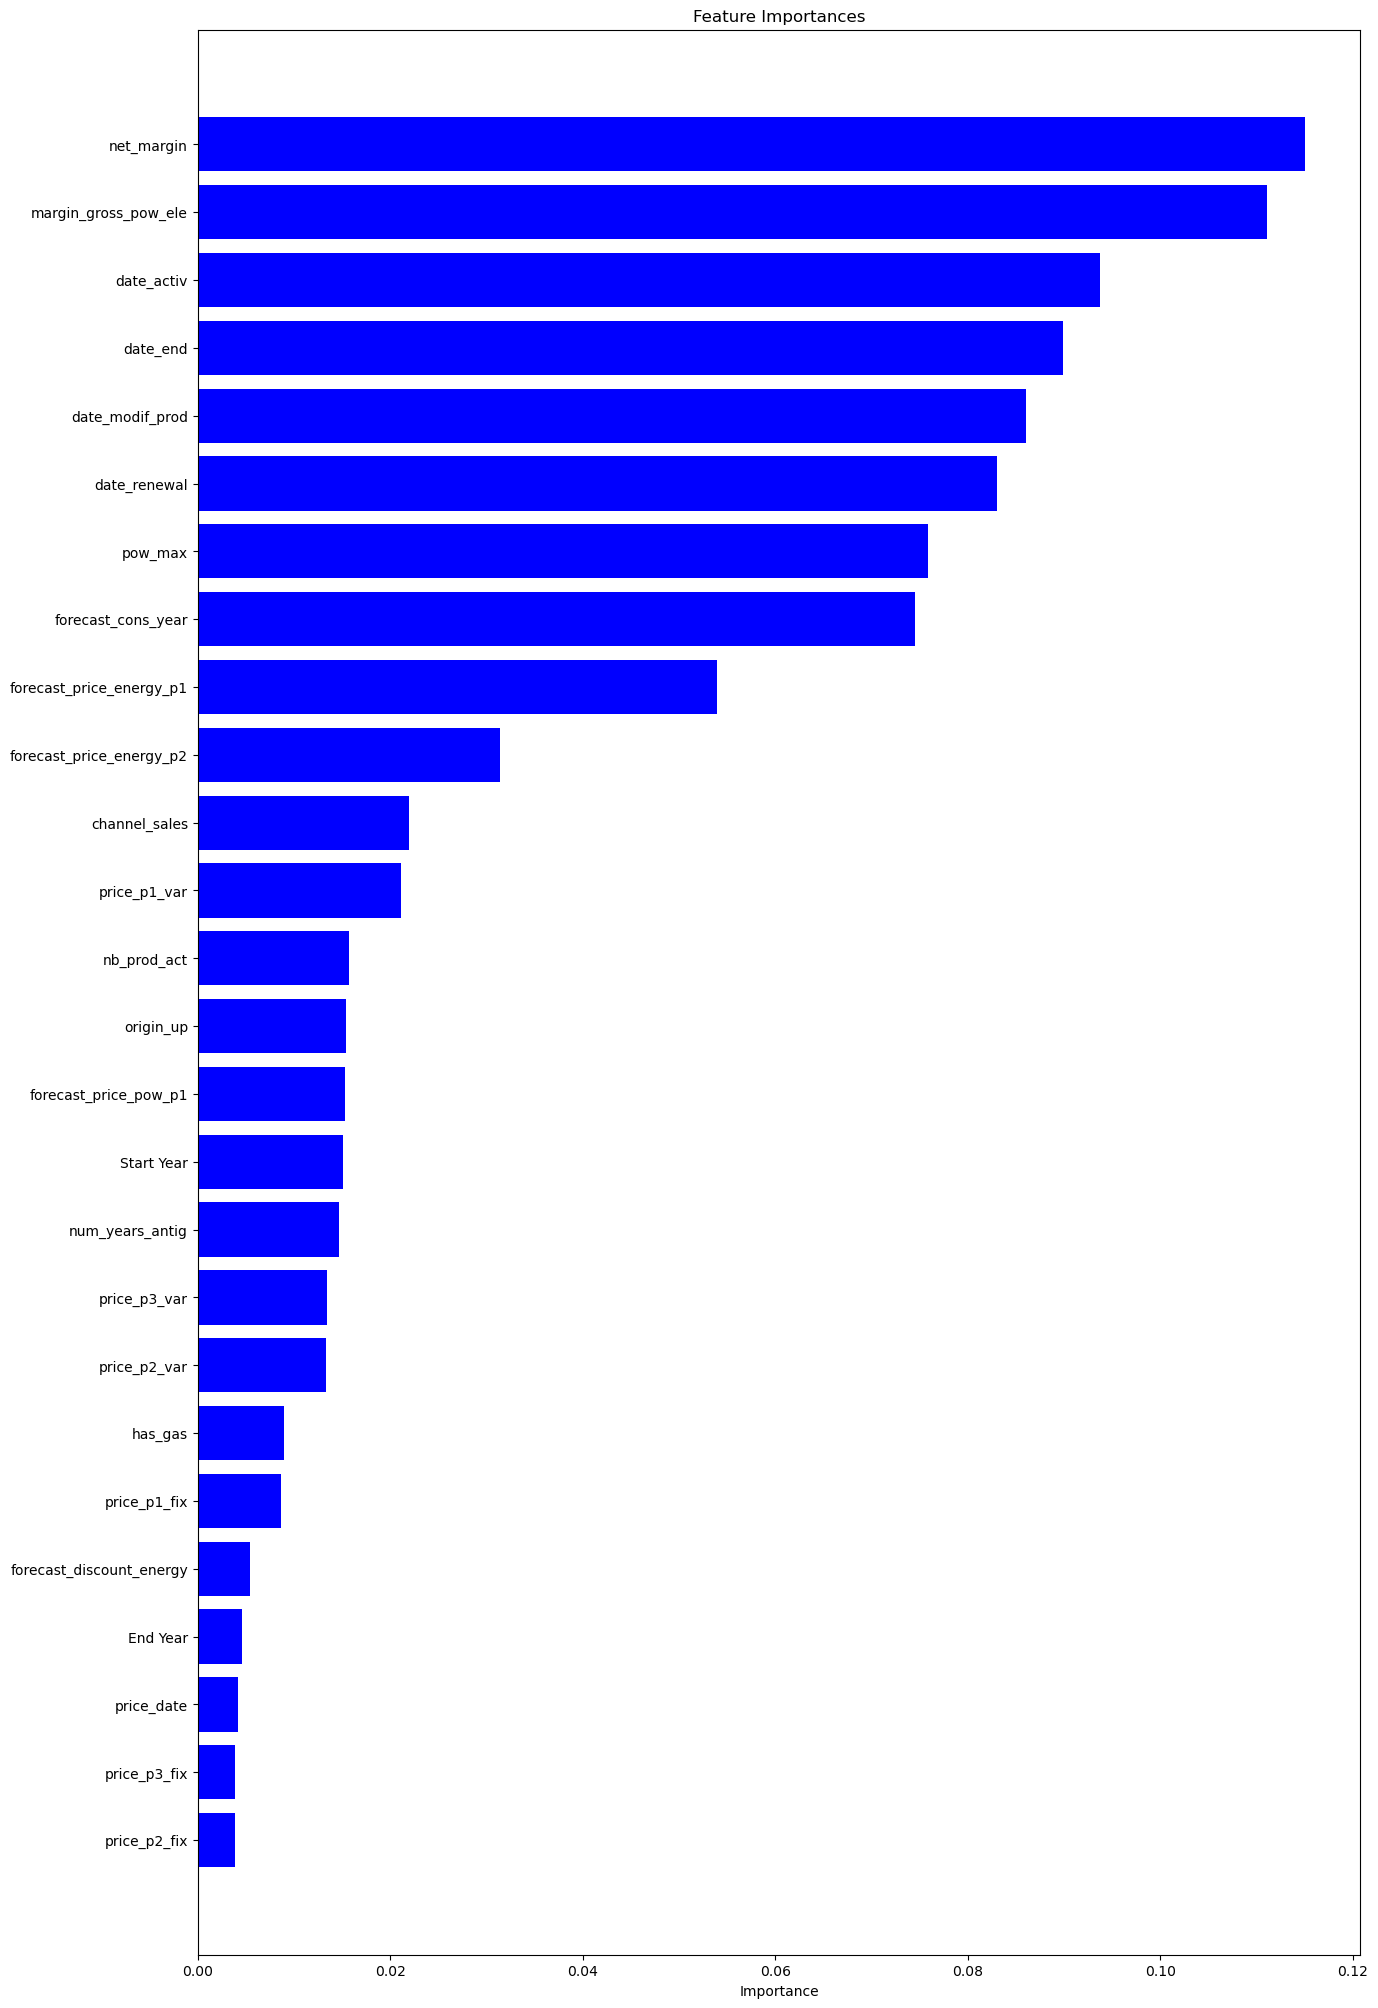

In [87]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b')
plt.yticks(range(len(feature_importances)), feature_importances['feature'])
plt.xlabel('Importance')
plt.show()

In Summary,

From the chart above, showing the most significant feature to be Net Margin

Followed by Margin gross power to be a relevant factor influencing churn

Tenure is also a contributing factor with respect to the years of being active, when they modified their product, 

and when their contracts where updated/renewed

Also, maximum power consumed is also an influential factor

We can see that price is not really a factor driving churn as it appears to be the least significant while some are scattered around but not 

significant.


In conclusion, 

From our Analysis done and the result of the feature importance to support our analysis and provide a more detailed interpretation,

Price sentivity is not the drive factor of customers churning though it contributes to it, but very minimal.

To Improve the rate of this churn, further experimentation might be considered.


#### Strategy formulation


Net margin is important to profitability of the organization but Improved quality of services

while the net margin is reasonable to the customers might prevent them from churning.
 
A satisfied customer will not be bothred with the value charged. Also, period/season can be a contributing factor 
    
as the economy might be affected and people will consider a cheaper option and a targeted price review for this period might help reduce churn rate.
                                                                                                  
Cost control might help reduce a higher gross margin which customers migh have considered in switching to a different service provider. 

Reasonable gross margin with an overall satisfactory experience might help reduce churning.

    

    